1) Brief description of the data set and a summary of its attributes

2) Initial plan for data exploration

3) Actions taken for data cleaning and feature engineering

4) Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

5) Formulating at least 3 hypothesis about this data

6) Conducting a formal significance test for one of the hypotheses and discuss the results 

7) Suggestions for next steps in analyzing this data

8) A paragraph that summarizes the quality of this data set and a request for additional data if needed

# Engineering Graduate Salary Prediction

India has a total 6,214 Engineering and Technology Institutions in which around 2.9 million students are enrolled. Every year, on an average 1.5 million students get their degree in engineering, but due to lack of skill required to perform technical jobs less than 20% get employment in their core domain.

A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

Source:
https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction

### Data 

**ID**: A unique ID to identify a candidate \
**Salary**: Annual CTC offered to the candidate (in INR) \
**Gender**: Candidate's gender \
**DOB**: Date of birth of the candidate \
**10percentage**: Overall marks obtained in grade 10 examinations \
**10board**: The school board whose curriculum the candidate followed in grade 10 \
**12graduation**: Year of graduation - senior year high school \
**12percentage**: Overall marks obtained in grade 12 examinations \
**12board**: The school board whose curriculum the candidate followed \
**CollegeID**: Unique ID identifying the university/college which the candidate attended for her/his undergraduate \
**CollegeTier**: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2. \
**Degree**: Degree obtained/pursued by the candidate \
**Specialization**: Specialization pursued by the candidate \
**CollegeGPA**: Aggregate GPA at graduation \ 
**CollegeCityID**: A unique ID to identify the city in which the college is located in. \
**CollegeCityTier**: The tier of the city in which the college is located in. This is annotated based on the population of the cities. \
**CollegeState**: Name of the state in which the college is located \
**GraduationYear**: Year of graduation (Bachelor's degree) \
**English**: Scores in AMCAT English section \
**Logical**: Score in AMCAT Logical ability section \
**Quant**: Score in AMCAT's Quantitative ability section \
**Domain**: Scores in AMCAT's domain module \
**ComputerProgramming**: Score in AMCAT's Computer programming section \
**ElectronicsAndSemicon**: Score in AMCAT's Electronics & Semiconductor Engineering section \
**ComputerScience**: Score in AMCAT's Computer Science section \
**MechanicalEngg**: Score in AMCAT's Mechanical Engineering section \
**ElectricalEngg**: Score in AMCAT's Electrical Engineering section \
**TelecomEngg**: Score in AMCAT's Telecommunication Engineering section \
**CivilEngg**: Score in AMCAT's Civil Engineering section \
**conscientiousness**: Scores in one of the sections of AMCAT's personality test \
**agreeableness**: Scores in one of the sections of AMCAT's personality test \
**extraversion**: Scores in one of the sections of AMCAT's personality test \
**nueroticism**: Scores in one of the sections of AMCAT's personality test \
**openess_to_experience**: Scores in one of the sections of AMCAT's personality test \

## Import the Required Library

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import library that might be in use

import pandas as pd
import numpy as np 
import math

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## Reading and Understanding Our Data

In [3]:
#import data
df = pd.read_csv('Engineering_graduate_salary.csv', sep=',')

In [4]:
#A brief look of the data
df.head()

ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0            1  ...             -1             -1           -1         -1   
1            2  ...             -1             -1           -1         -1   
2            2  ...             -1             -1          260         -1   
3            1  ...             -1             -1           -1         -1   
4            2  ...             -1             -1           -1         -1   

   conscientiousness agreeableness  extraversion  nueroticism  \
0            -0.1590        0.3789        1.2396      0.14590   
1             1.1336        0.0459        1.2396      0.52620   
2             0.5100       -0.1232        1.5428     -0.29020   
3            -0.4463        0.2124        0.3174      0.27270   
4            -1.4992       -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  

[5 rows x 34 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

We can see that there is no missing values in every feature because they all have 2998 non-null count which is the same amount as the total entries

In [6]:
df.describe()

ID  10percentage  12graduation  12percentage     CollegeID  \
count  2.998000e+03   2998.000000   2998.000000   2998.000000   2998.000000   
mean   6.648926e+05     77.666264   2008.080720     74.341061   5210.210807   
std    3.648951e+05     10.002785      1.631814     11.120299   4776.609877   
min    1.124400e+04     43.000000   1998.000000     40.000000      2.000000   
25%    3.334648e+05     71.140000   2007.000000     66.000000    526.250000   
50%    6.396945e+05     78.965000   2008.000000     74.000000   4027.500000   
75%    9.951770e+05     85.600000   2009.000000     82.600000   8822.250000   
max    1.297877e+06     97.760000   2012.000000     98.700000  18409.000000   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  2998.000000  2998.000000    2998.000000      2998.000000   
mean      1.924616    71.509857    5210.210807         0.296197   
std       0.264053     8.122462    4776.609877         0.456655   
min       1.000000     6.630000       2.000000         0.000000   
25%       2.000000    66.530000     526.250000         0.000000   
50%       2.000000    71.800000    4027.500000         0.000000   
75%       2.000000    76.300000    8822.250000         1.000000   
max       2.000000    99.930000   18409.000000         1.000000   

       GraduationYear  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count     2998.000000  ...     2998.000000     2998.000000  2998.000000   
mean      2011.939960  ...       24.138759       16.267845    31.068379   
std         36.780582  ...       99.785138       86.054739   103.552963   
min          0.000000  ...       -1.000000       -1.000000    -1.000000   
25%       2012.000000  ...       -1.000000       -1.000000    -1.000000   
50%       2013.000000  ...       -1.000000       -1.000000    -1.000000   
75%       2014.000000  ...       -1.000000       -1.000000    -1.000000   
max       2017.000000  ...      623.000000      660.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  2998.000000        2998.000000    2998.000000   2998.000000   
mean      1.946965          -0.038714       0.126217     -0.008662   
std      32.241501           1.024974       0.955831      0.962695   
min      -1.000000          -3.893300      -5.781600     -4.600900   
25%      -1.000000          -0.649100      -0.435300     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     500.000000           1.995300       1.904800      2.161700   

       nueroticism  openess_to_experience        Salary  
count  2998.000000            2998.000000  2.998000e+03  
mean     -0.145965              -0.141111  3.051748e+05  
std       1.012901               1.007134  2.123312e+05  
min      -2.643000              -7.375700  3.500000e+04  
25%      -0.868200              -0.669200  1.800000e+05  
50%      -0.172700              -0.094300  3.000000e+05  
75%       0.526200               0.502400  3.700000e+05  
max       3.352500               1.630200  4.000000e+06  

[8 rows x 27 columns]

In [7]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['count', 'mean', 'std', '25%','50%','75%', 'min', 'max', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

ID  10percentage  12graduation  12percentage     CollegeID  \
count   2.998000e+03   2998.000000   2998.000000   2998.000000   2998.000000   
mean    6.648926e+05     77.666264   2008.080720     74.341061   5210.210807   
std     3.648951e+05     10.002785      1.631814     11.120299   4776.609877   
25%     3.334648e+05     71.140000   2007.000000     66.000000    526.250000   
median  6.396945e+05     78.965000   2008.000000     74.000000   4027.500000   
75%     9.951770e+05     85.600000   2009.000000     82.600000   8822.250000   
min     1.124400e+04     43.000000   1998.000000     40.000000      2.000000   
max     1.297877e+06     97.760000   2012.000000     98.700000  18409.000000   
range   1.286633e+06     54.760000     14.000000     58.700000  18407.000000   

        CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   2998.000000  2998.000000    2998.000000      2998.000000   
mean       1.924616    71.509857    5210.210807         0.296197   
std        0.264053     8.122462    4776.609877         0.456655   
25%        2.000000    66.530000     526.250000         0.000000   
median     2.000000    71.800000    4027.500000         0.000000   
75%        2.000000    76.300000    8822.250000         1.000000   
min        1.000000     6.630000       2.000000         0.000000   
max        2.000000    99.930000   18409.000000         1.000000   
range      1.000000    93.300000   18407.000000         1.000000   

        GraduationYear  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count      2998.000000  ...     2998.000000     2998.000000  2998.000000   
mean       2011.939960  ...       24.138759       16.267845    31.068379   
std          36.780582  ...       99.785138       86.054739   103.552963   
25%        2012.000000  ...       -1.000000       -1.000000    -1.000000   
median     2013.000000  ...       -1.000000       -1.000000    -1.000000   
75%        2014.000000  ...       -1.000000       -1.000000    -1.000000   
min           0.000000  ...       -1.000000       -1.000000    -1.000000   
max        2017.000000  ...      623.000000      660.000000   548.000000   
range      2017.000000  ...      624.000000      661.000000   549.000000   

          CivilEngg  conscientiousness  agreeableness  extraversion  \
count   2998.000000        2998.000000    2998.000000   2998.000000   
mean       1.946965          -0.038714       0.126217     -0.008662   
std       32.241501           1.024974       0.955831      0.962695   
25%       -1.000000          -0.649100      -0.435300     -0.604800   
median    -1.000000           0.046400       0.212400      0.091400   
75%       -1.000000           0.702700       0.812800      0.672000   
min       -1.000000          -3.893300      -5.781600     -4.600900   
max      500.000000           1.995300       1.904800      2.161700   
range    501.000000           5.888600       7.686400      6.762600   

        nueroticism  openess_to_experience        Salary  
count   2998.000000            2998.000000  2.998000e+03  
mean      -0.145965              -0.141111  3.051748e+05  
std        1.012901               1.007134  2.123312e+05  
25%       -0.868200              -0.669200  1.800000e+05  
median    -0.172700              -0.094300  3.000000e+05  
75%        0.526200               0.502400  3.700000e+05  
min       -2.643000              -7.375700  3.500000e+04  
max        3.352500               1.630200  4.000000e+06  
range      5.995500               9.005900  3.965000e+06  

[9 rows x 27 columns]

## Handling the Duplicates

In [8]:
#Check if there is any duplicate in our dataframe
df['ID'].duplicated().sum()

np.int64(0)

In [9]:
df.ID.is_unique

True

In [10]:
df.index.is_unique

True


## Handling the Missing Values 

Text(0.5, 1.0, 'Total Missing Values')

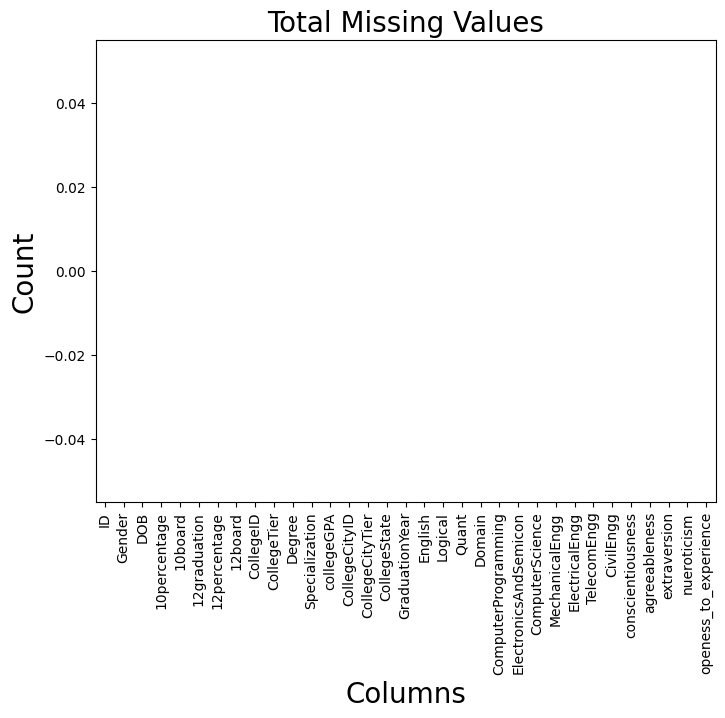

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(33)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

The empty figure confirms that there are no missing values

## Feature Selection 

In [13]:
#We will get rid of some irrelevant columns that do not affect salaries, such as 'ID', 'DOB', '10board', '12board' 
#and so on

df1 = df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'GraduationYear','10board', '12board' , 'CollegeState','CollegeCityID', 
              'CollegeCityTier'], axis = 1)
df1.head()

Gender  10percentage  12percentage  CollegeTier       Degree  \
0      f         87.80         84.00            1  B.Tech/B.E.   
1      m         57.00         64.50            2  B.Tech/B.E.   
2      m         77.33         85.17            2  B.Tech/B.E.   
3      m         84.30         86.00            1  B.Tech/B.E.   
4      f         82.00         75.00            2  B.Tech/B.E.   

                            Specialization  collegeGPA  English  Logical  \
0  instrumentation and control engineering       73.82      650      665   
1           computer science & engineering       65.00      440      435   
2         electronics & telecommunications       61.94      485      475   
3           computer science & engineering       80.40      675      620   
4                            biotechnology       64.30      575      495   

   Quant  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0    810  ...              -1              -1           -1         -1   
1    210  ...              -1              -1           -1         -1   
2    505  ...              -1              -1          260         -1   
3    635  ...              -1              -1           -1         -1   
4    365  ...              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0            -0.1590         0.3789        1.2396      0.14590   
1             1.1336         0.0459        1.2396      0.52620   
2             0.5100        -0.1232        1.5428     -0.29020   
3            -0.4463         0.2124        0.3174      0.27270   
4            -1.4992        -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  

[5 rows x 24 columns]

In [14]:
#Check if there is any duplicate in our dataframe
df1.duplicated().sum()

np.int64(0)

In [15]:
spec_counts = df1.Specialization.value_counts()
spec_counts

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
information science engineering                 18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and a

In [16]:
#We will include Specialization that occupied by less than 10 graduates into one 'Other' category.
#Because a lot of single values can unnecessarily affect the model if we try to train it using this data. We can group those 
#data together since they're not adding much value to the 'information' as a whole

others_spec = list(spec_counts[spec_counts <= 10].index)

df2 = df1.copy()

df2['Specialization'] = df1['Specialization'].replace(others_spec, 'Others')

df2.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: count, dtype: int64

## Handling the Outliers 

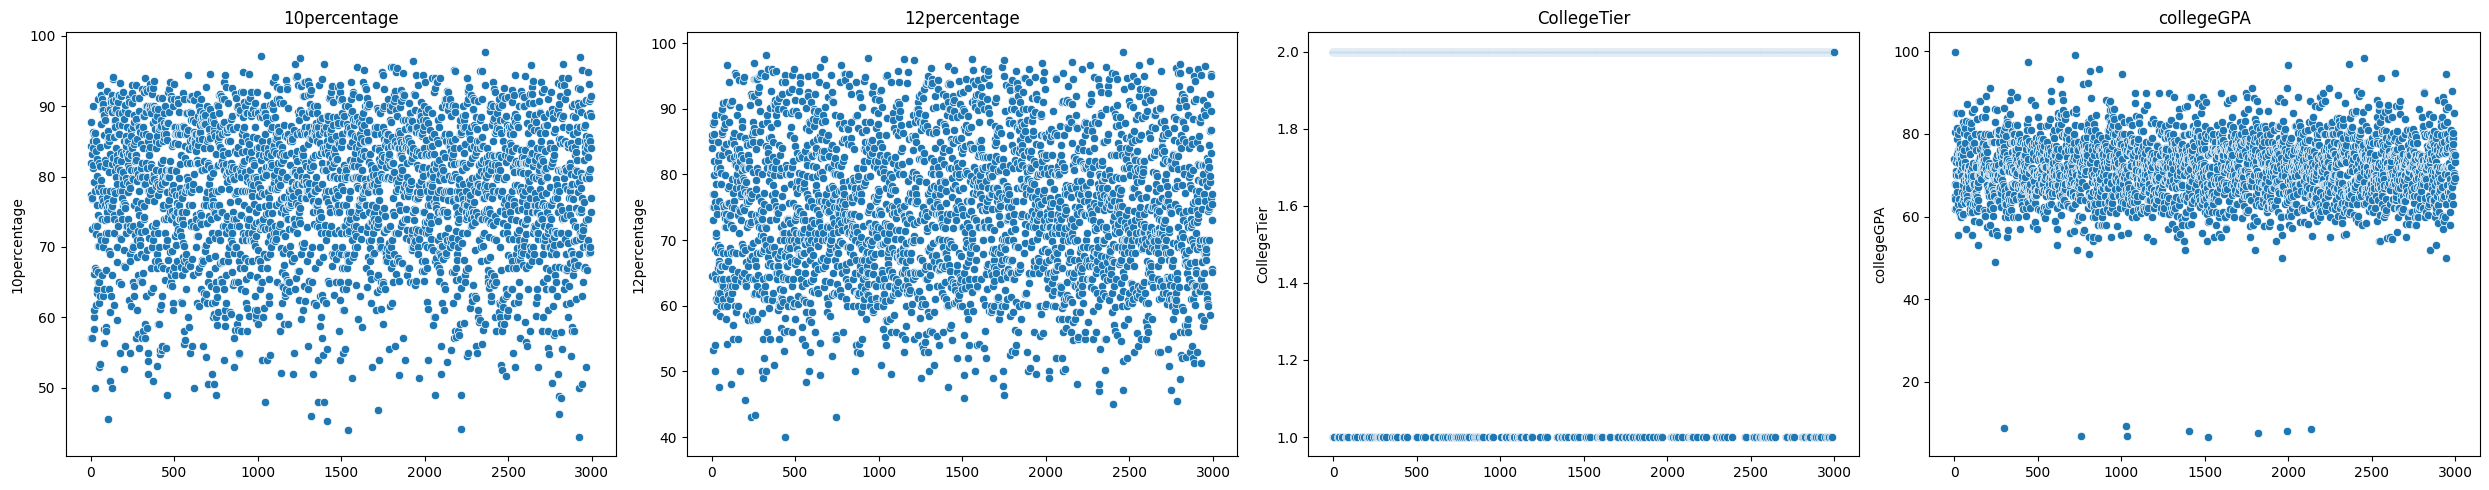

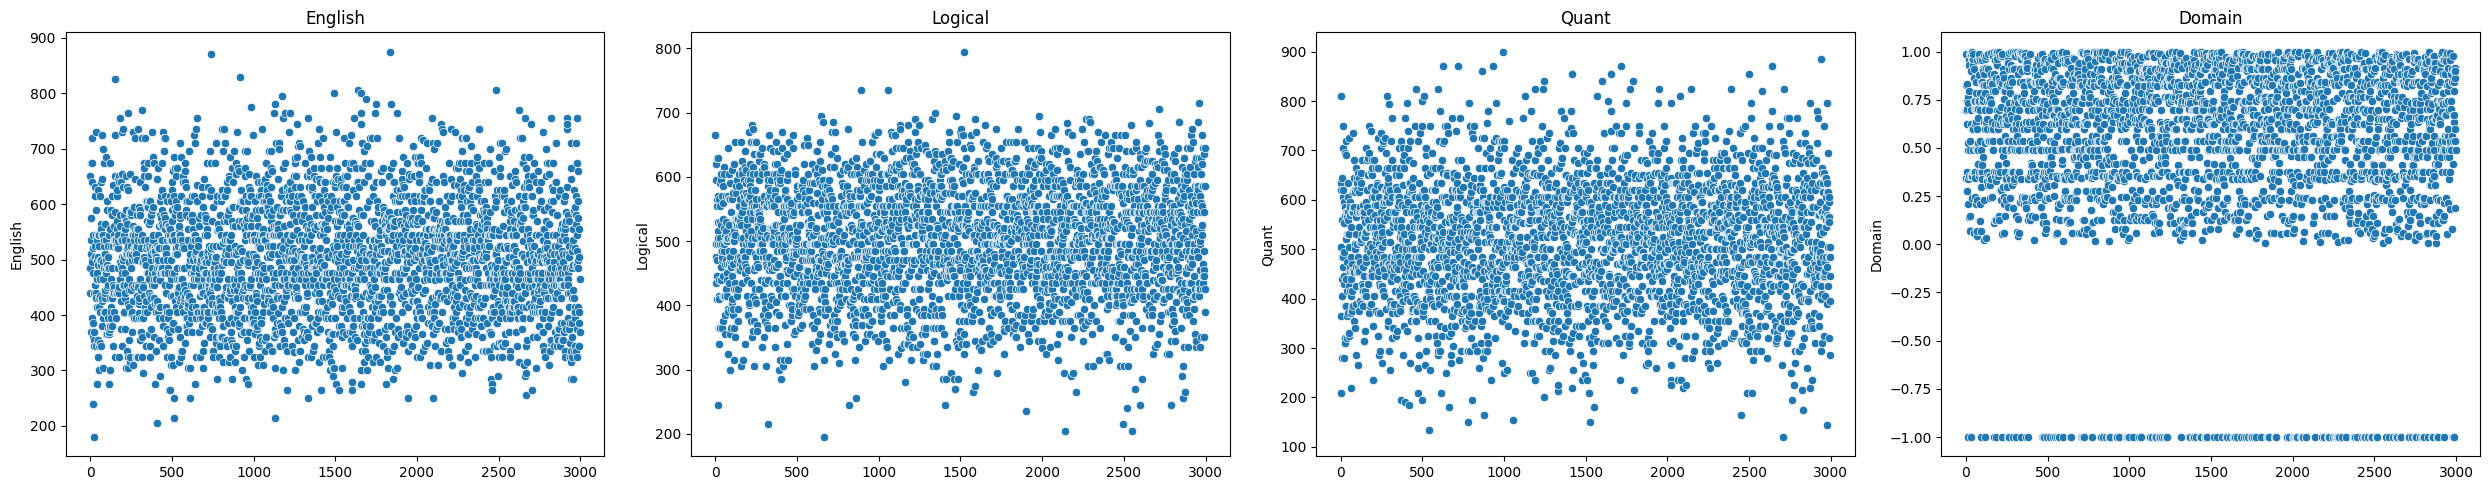

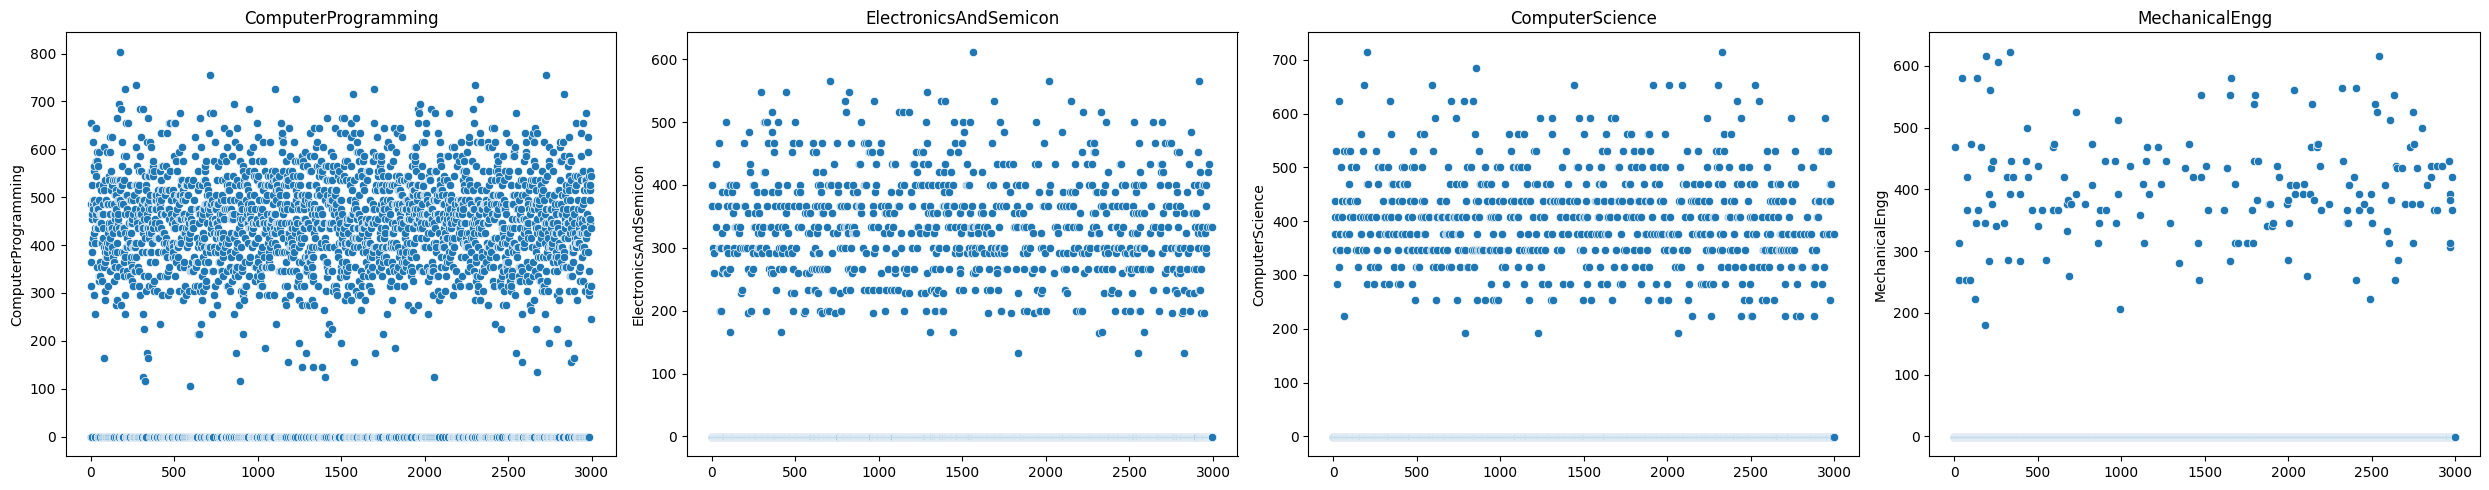

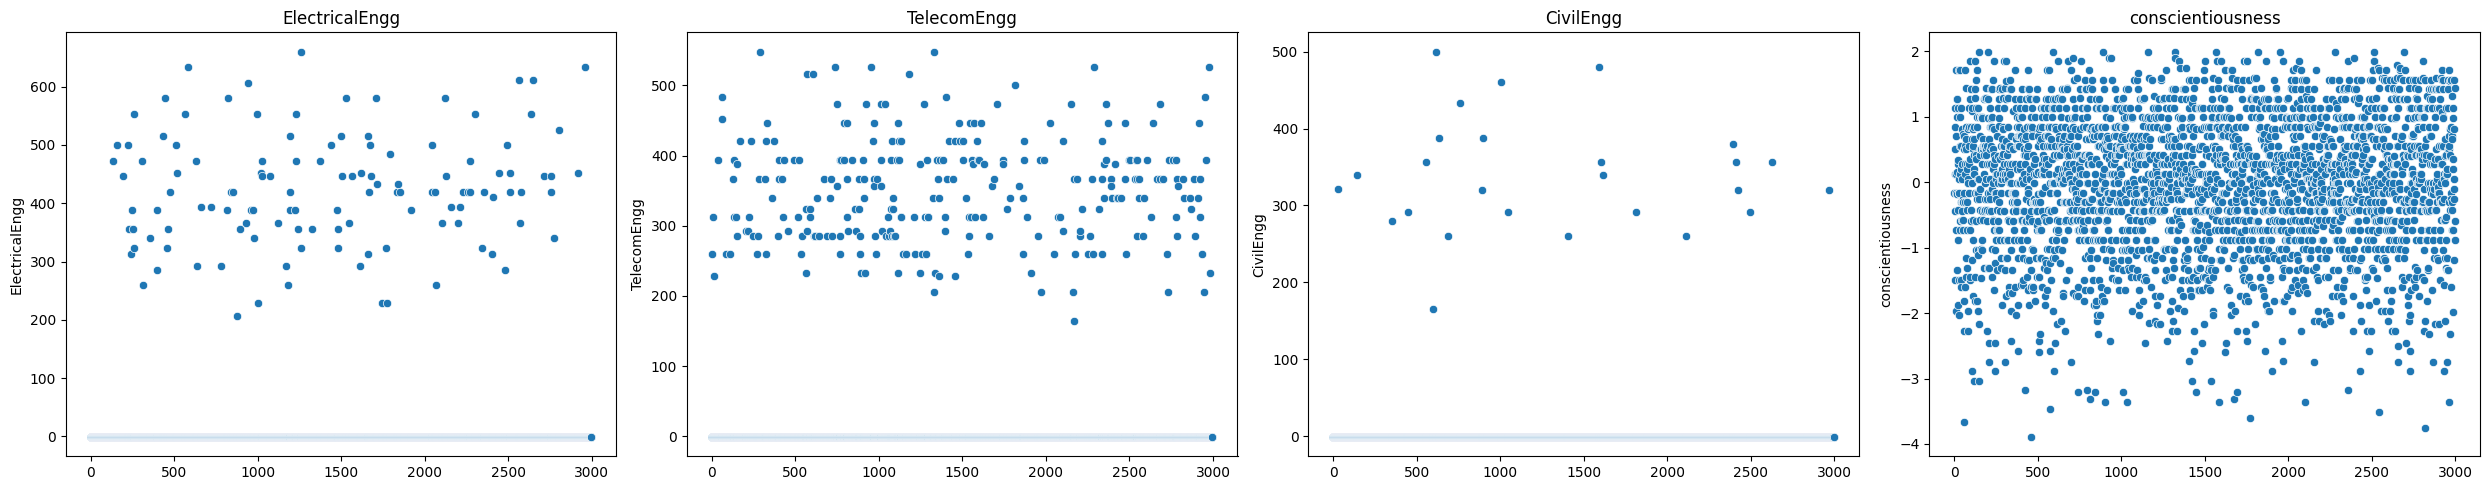

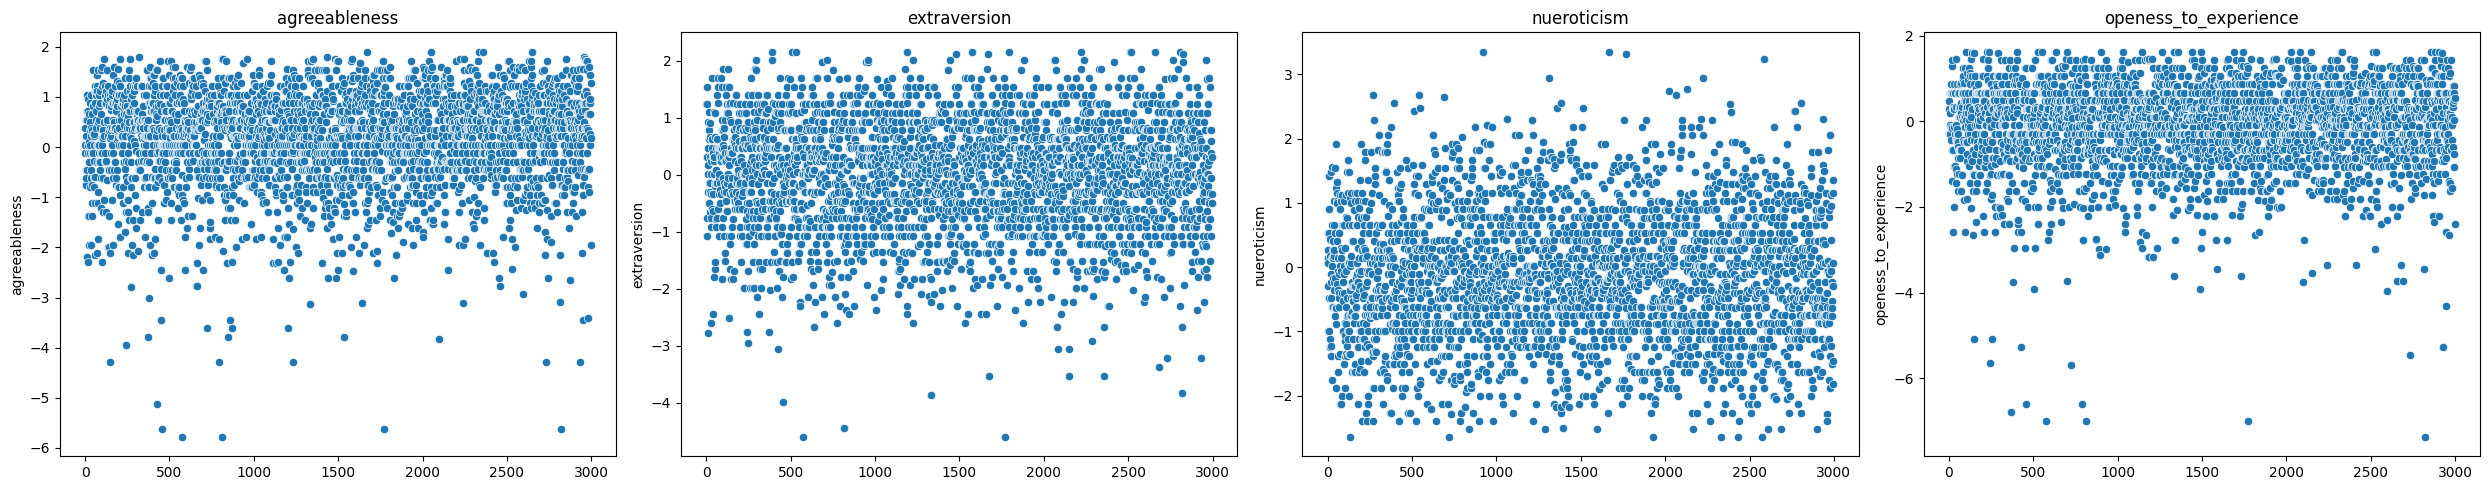

In [36]:
df2_num = df2.select_dtypes(include = ['float64', 'int64'])
df2_dist = df2_num.drop("Salary", axis=1)

for i in range(0, len(df2_dist.columns), 4):
    fig, axes = plt.subplots(1, 4, figsize=(25, 5))
    
    for j, col in enumerate(df2_dist.columns[i:i+4]):
        sns.scatterplot(x=df2_dist.index, y=df2_dist[col], ax=axes[j])
        axes[j].set_title(col, fontsize=12)
        axes[j].set_xlabel(None)

    plt.tight_layout()
    plt.show()

<Axes: xlabel='collegeGPA'>

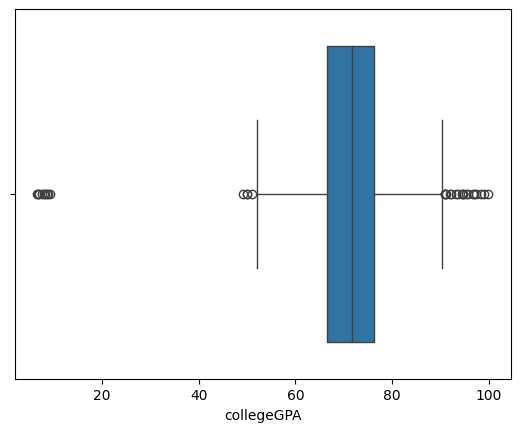

In [38]:
#From the plots above, we can visually detect outliers in collegeGPA and Domain attributes
#We will try to get rid of the outliers using Uni-variate analysis (box plot)

sns.boxplot(x=df2['collegeGPA'])

<Axes: xlabel='collegeGPA'>

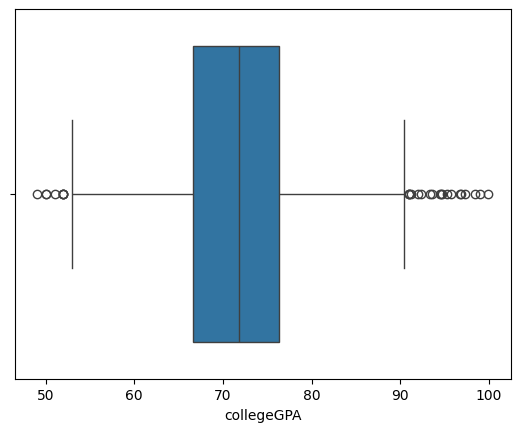

In [39]:
#The boxplot clearly shows that the values mostly lie in 50–100 range and we can safely drop values less than 20 which can 
#produce unnecessary bias. Or in the other way, only include GPA > 40

df2 = df2[(df2['collegeGPA'] > 40)]
sns.boxplot(x=df2['collegeGPA'])

In [44]:
#We found out that in variables Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg,
#ElectricalEngg, TelecommEngg, and CivilEngg all data outliers are in -1 values. To handle these outliers, we will replace -1 
#with nan first, and then fill the nan values with mean values

cols_to_fix = [
    "Domain", "ComputerProgramming", "ElectronicsAndSemicon",
    "ComputerScience", "MechanicalEngg", "ElectricalEngg",
    "TelecomEngg", "CivilEngg"
]

# replace -1 with NaN only in the 8 columns
df2[cols_to_fix] = df2[cols_to_fix].replace(-1, np.nan)

# fill NaN with column mean only in those 8 columns
for col in cols_to_fix:
    df2[col] = df2[col].fillna(df2[col].mean())


In [26]:
#This is the sample solution if you only want to replace and fillna only in a certain column

#df2['Domain'].replace(-1, np.nan, inplace=True)
#df2['Domain'].fillna(df2['Domain'].mean())

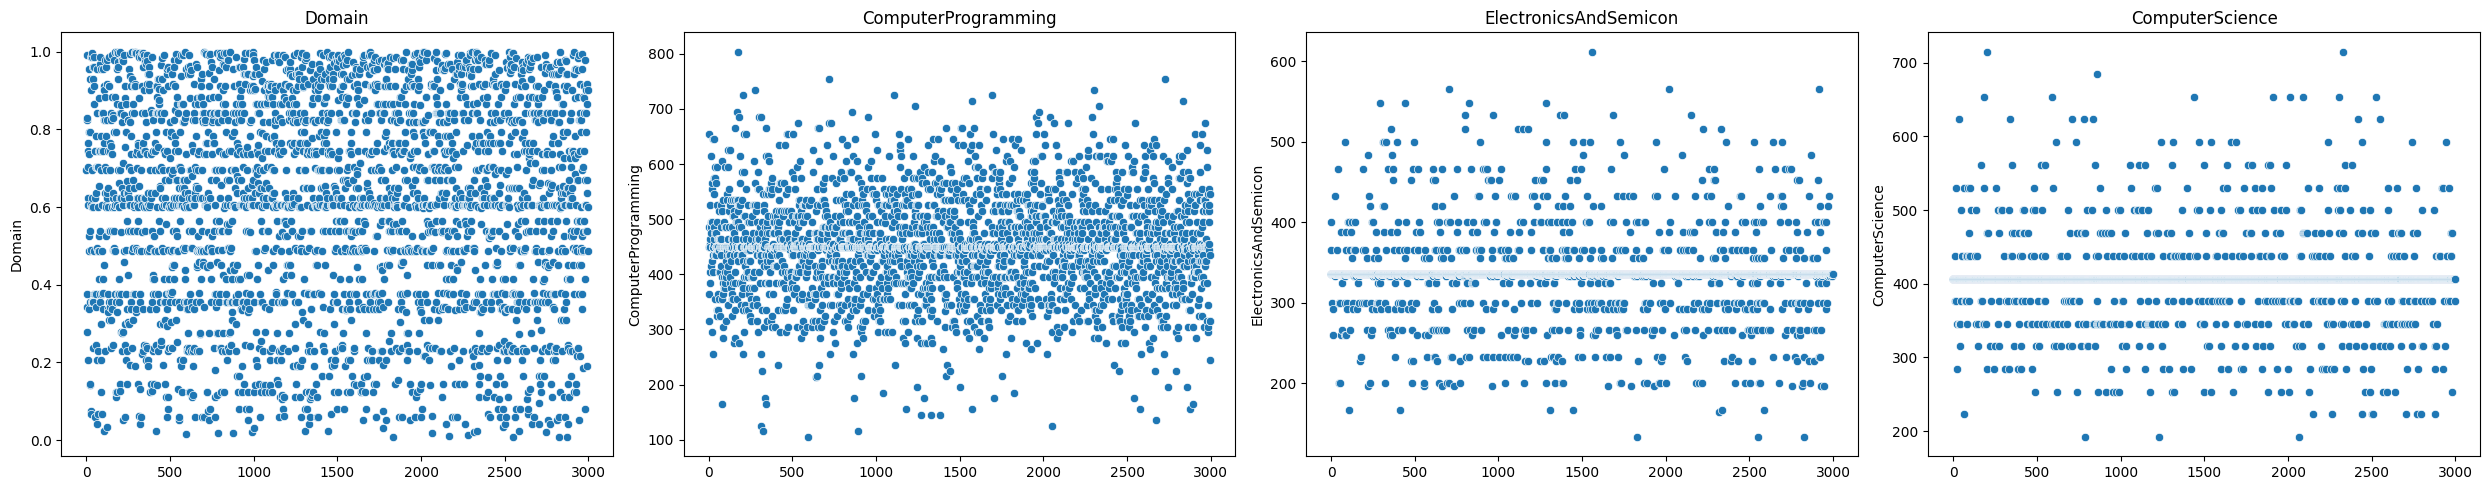

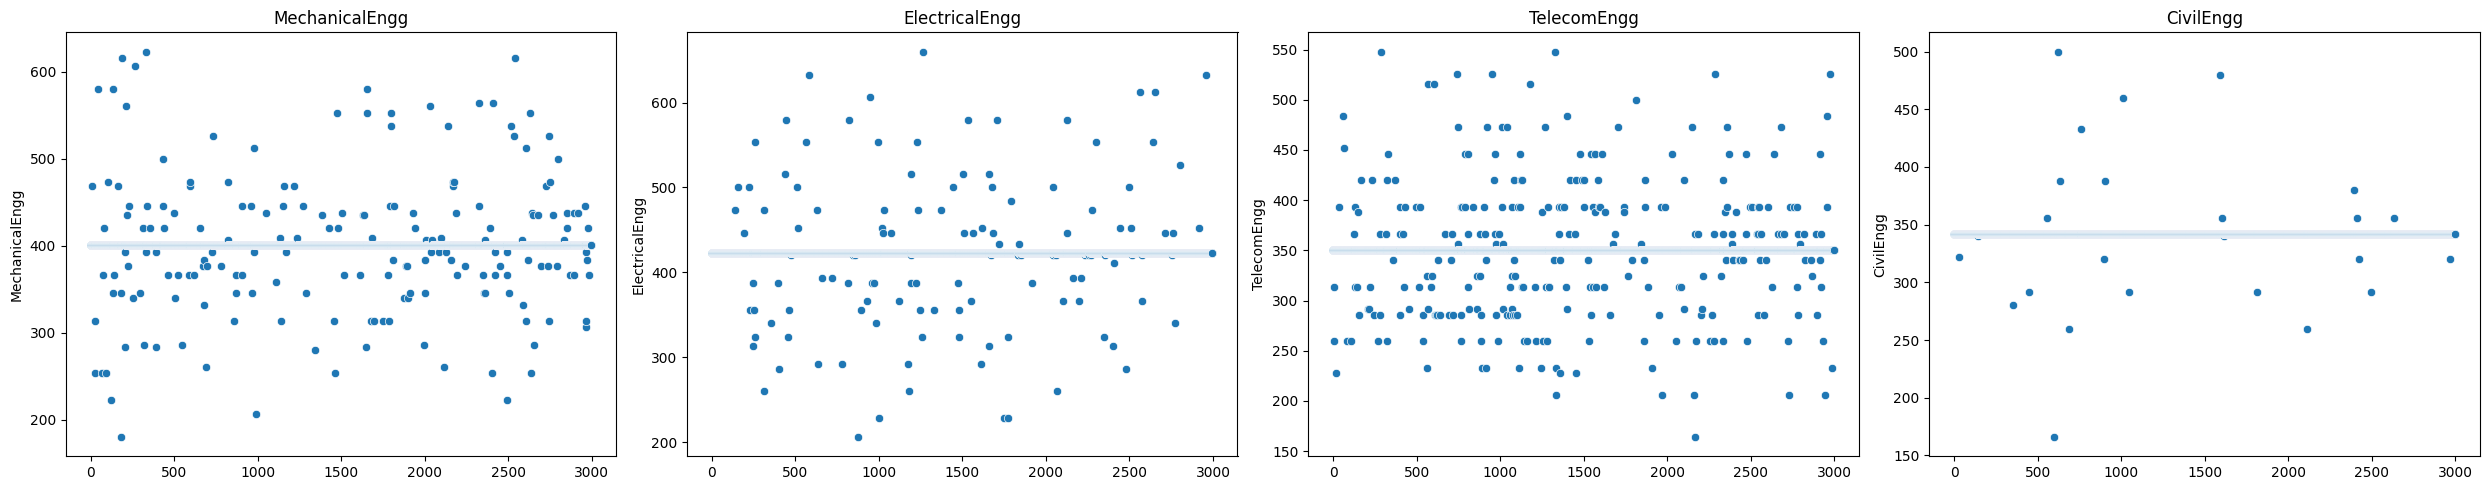

In [46]:
for i in range(0, len(df2[cols_to_fix].columns), 4):
    fig, axes = plt.subplots(1, 4, figsize=(25, 5))
    
    for j, col in enumerate(df2[cols_to_fix].columns[i:i+4]):
        sns.scatterplot(x=df2[cols_to_fix].index, y=df2[cols_to_fix][col], ax=axes[j])
        axes[j].set_title(col, fontsize=12)
        axes[j].set_xlabel(None)

    plt.tight_layout()
    plt.show()

# [2] Exploratory Data Analysis

## Looking for Correlations 

In [28]:
df2_num = df2.select_dtypes(include = ['float64', 'int64'])
df2_num_corr = df2_num.corr()['Salary'][:-1] # -1 means that the latest row is Salary
#menghitung koefisien korelasi pearson dari setiap feature numerik ke target 'SalePrice'
top_features = df2_num_corr.sort_values(ascending=False)
top_features

#top_features = df2_num_corr[abs(df2_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
#print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))
#hanya memilih features yang korelasinya tinggi (>0.5)

Quant                    0.238025
Logical                  0.192844
ComputerProgramming      0.189329
Domain                   0.184818
10percentage             0.180528
English                  0.178810
12percentage             0.171857
collegeGPA               0.149643
agreeableness            0.074807
ComputerScience          0.056355
MechanicalEngg           0.048106
ElectronicsAndSemicon    0.047189
CivilEngg                0.033688
ElectricalEngg           0.031881
TelecomEngg              0.020219
openess_to_experience    0.000987
extraversion            -0.004129
conscientiousness       -0.046078
nueroticism             -0.069793
CollegeTier             -0.175449
Name: Salary, dtype: float64

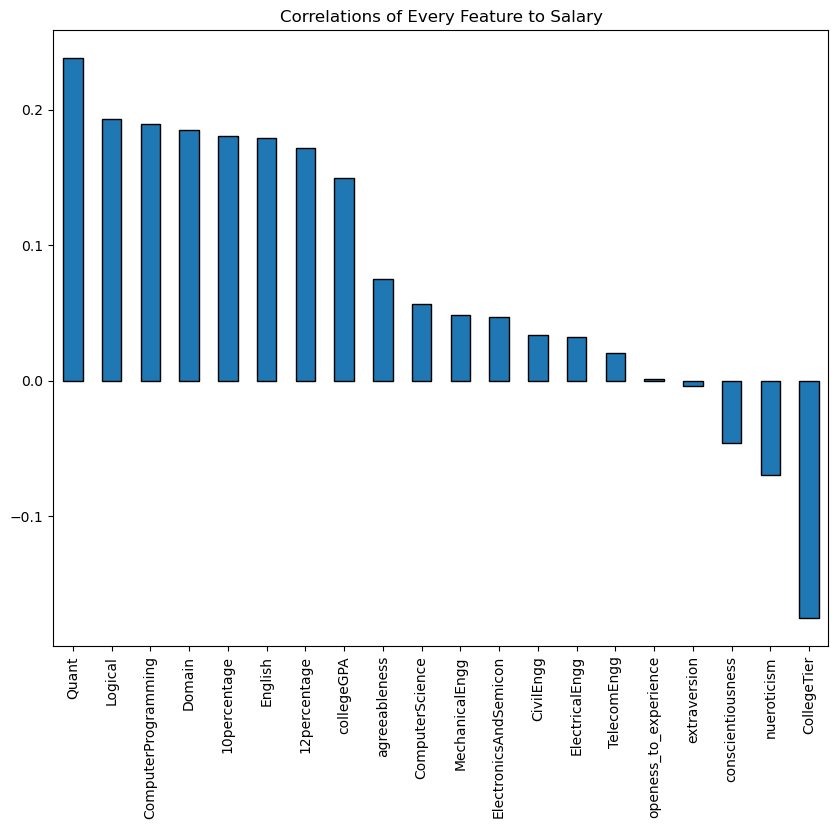

In [29]:
top_features.plot(kind='bar',figsize=(10,8), title='Correlations of Every Feature to Salary', color='tab:blue', edgecolor='black')
save_results_to = 'G:/data/'
plt.savefig(save_results_to + 'Correlations of Every Feature to Salary.png')

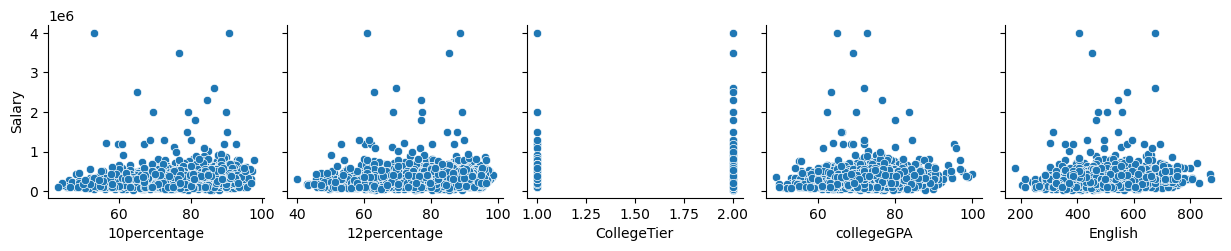

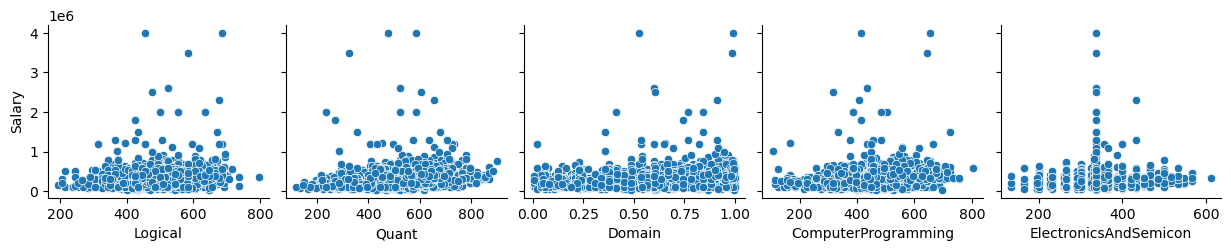

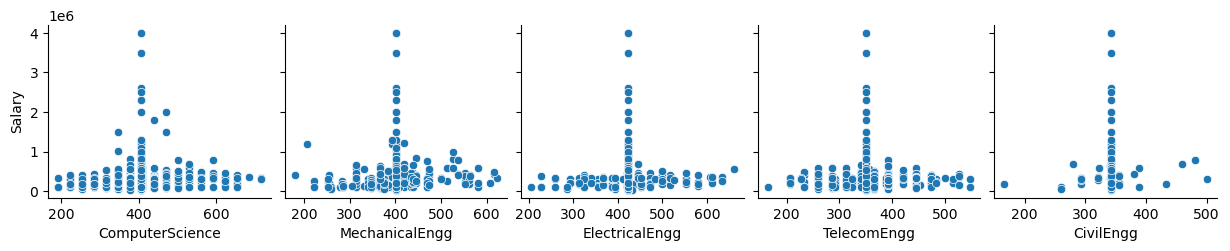

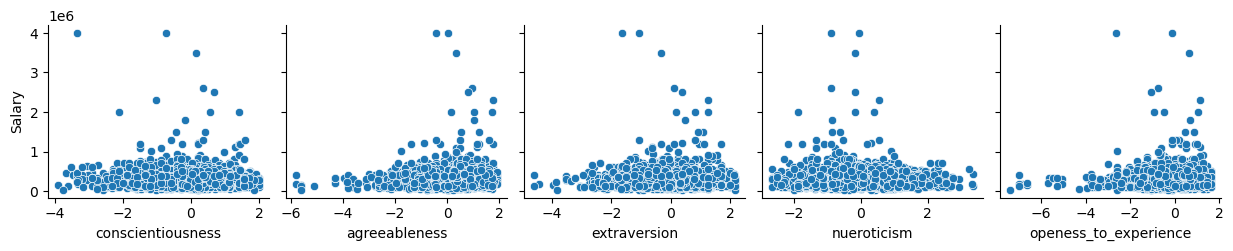

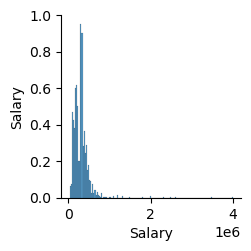

In [30]:
sns.set_palette('tab10')
for i in range(0, len(df2_num.columns), 5):
    sns.pairplot(data=df2_num,
                x_vars=df2_num.columns[i:i+5],
                y_vars=['Salary'])
    
#plt.savefig(save_results_to + 'Pairplot of Correlations.png')

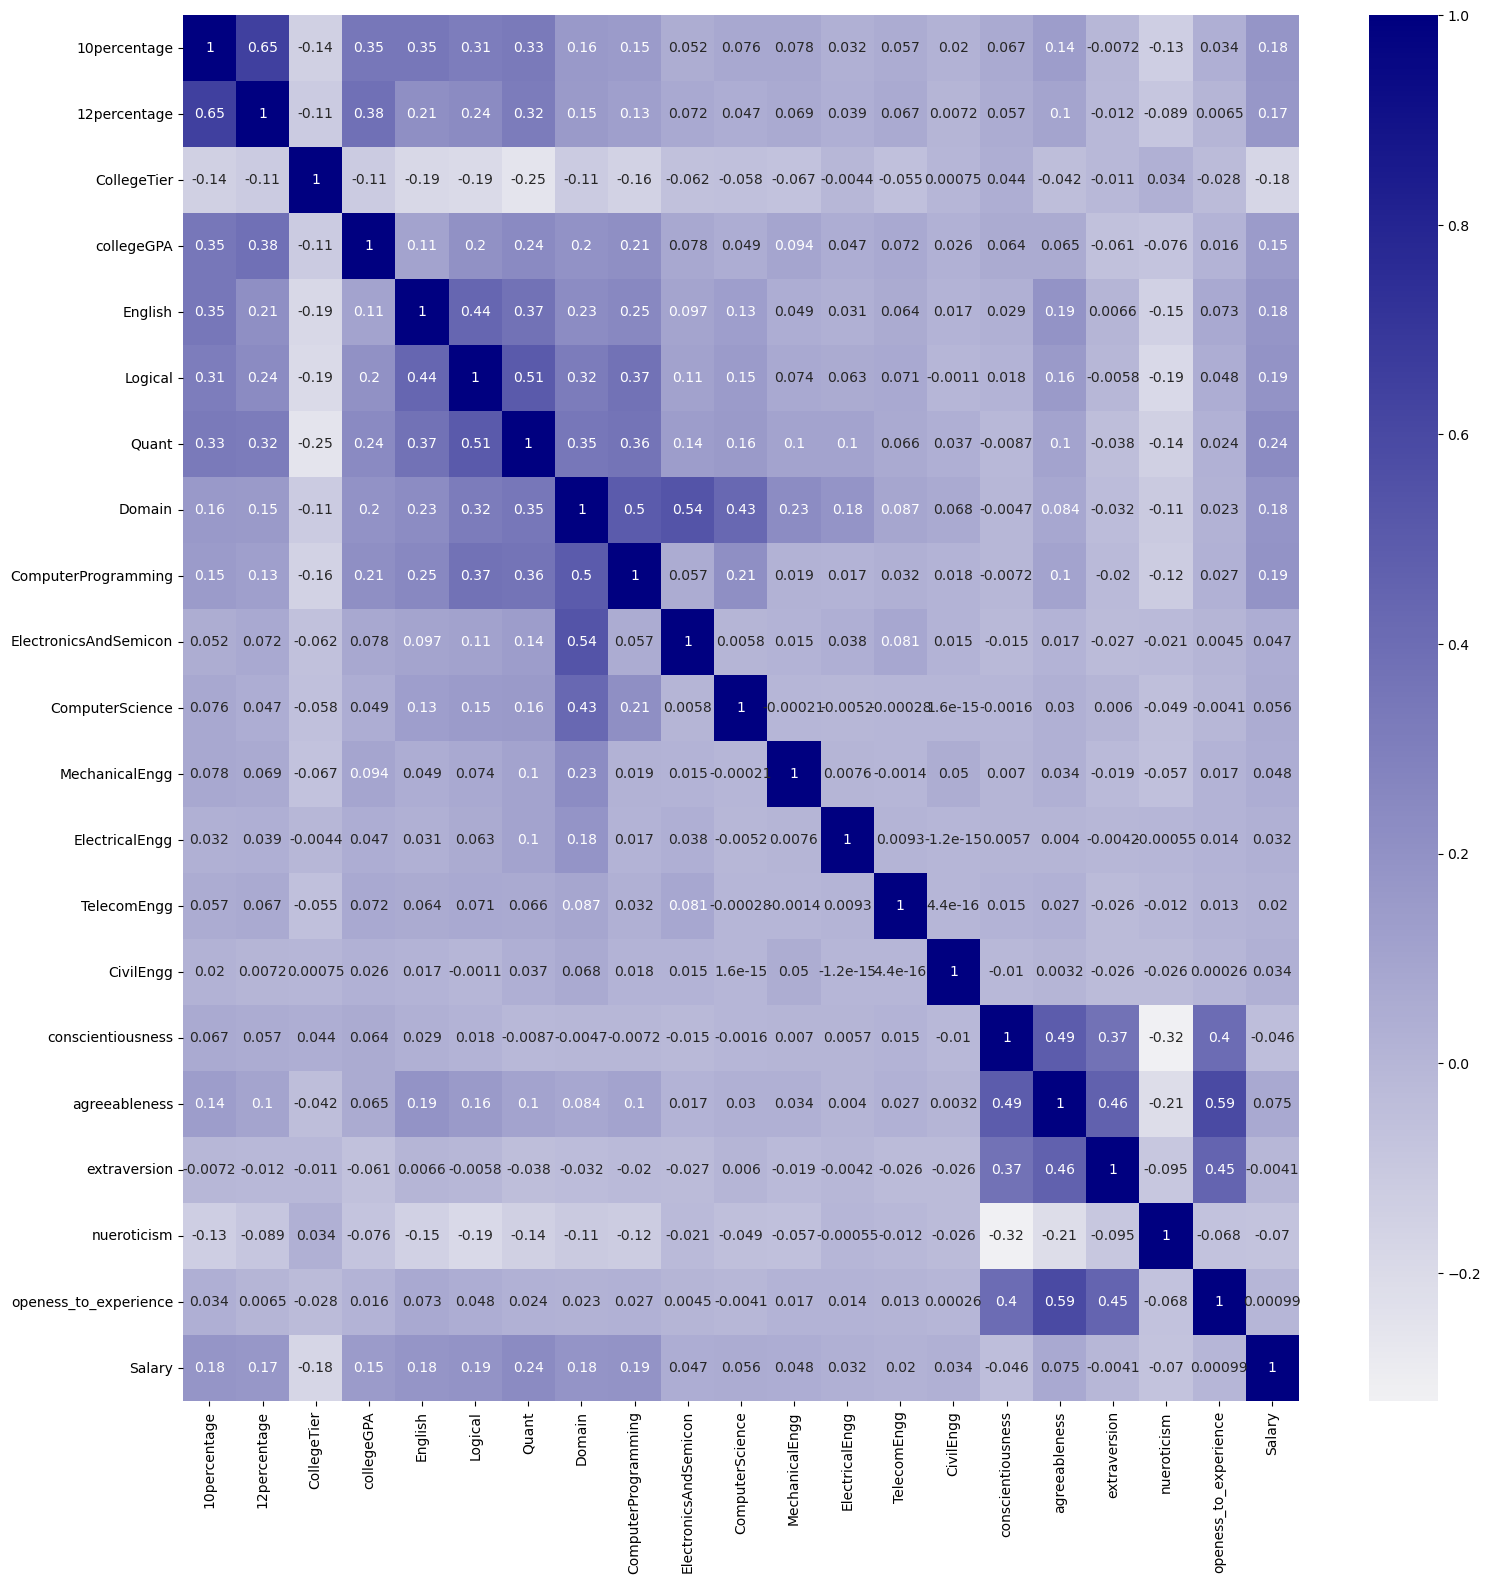

In [31]:
my_cmap = sns.light_palette("Navy", as_cmap=True)
#my_cmap1 = sns.set_palette('Spectral')
plt.figure(figsize=(18,18))
sns.heatmap(df2_num.corr(),annot=True,cmap=my_cmap)

plt.show()

## Skew Variables 

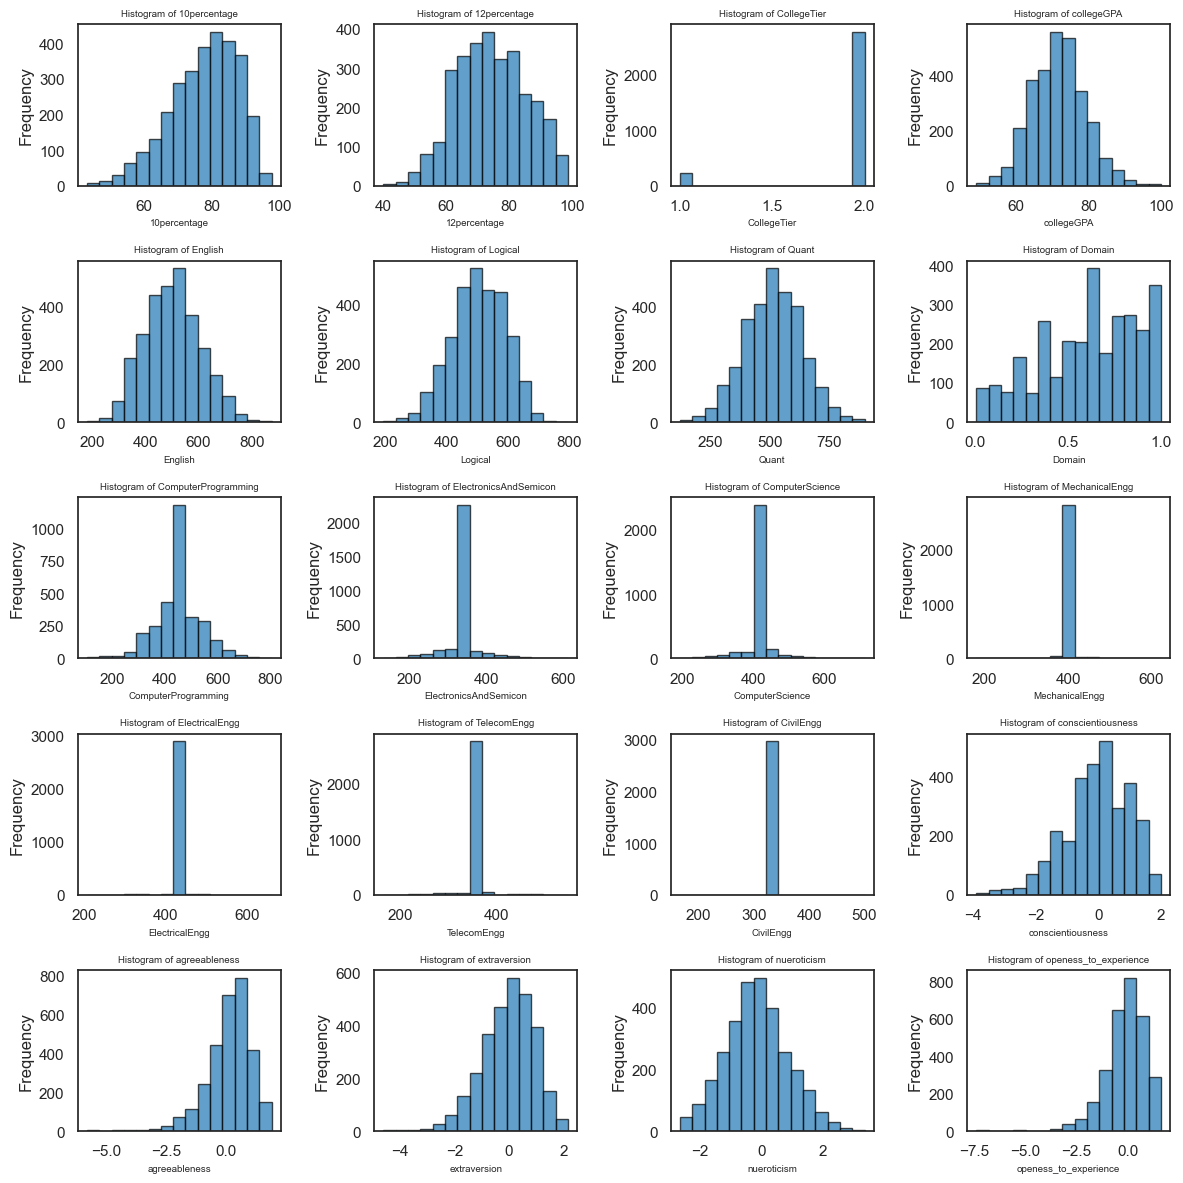

In [105]:
# Number of histograms to display
num_histograms = 21

# Create a 4x4 grid of subplots to accommodate 16 histograms
num_rows = 5
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array to iterate through subplots easily
axes_flat = axes.flatten()

# Get a list of (16) distinct colors from the tab20 colormap
#colors = plt.cm.tab10.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, (column, ax) in enumerate(zip(df2_num.columns, axes_flat)):
    df2_num[column].plot.hist(ax=ax, bins=15, alpha=0.7, color='tab:blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)

# Remove any extra empty subplots if the number of variables is less than 16
#if i < num_histograms - 1:
    #for j in range(i + 1, num_histograms):
        #fig.delaxes(axes_flat[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [33]:
skew_limit = 0.75
skew_vals = df2.skew()

In [34]:
skew_vals

10percentage            -0.576969
12percentage            -0.024342
CollegeTier             -3.230361
collegeGPA               0.176865
English                  0.188906
Logical                 -0.211478
Quant                   -0.040874
Domain                  -0.363457
ComputerProgramming     -0.031824
ElectronicsAndSemicon    0.566217
ComputerScience          0.900277
MechanicalEngg           1.099880
ElectricalEngg           0.779338
TelecomEngg              1.000500
CivilEngg                2.161788
conscientiousness       -0.516684
agreeableness           -1.263306
extraversion            -0.522413
nueroticism              0.169693
openess_to_experience   -1.547854
Salary                   6.980897
dtype: float64

In [35]:
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
#a = abs(skew_cols)
skew_cols

Salary                   6.980897
CivilEngg                2.161788
MechanicalEngg           1.099880
TelecomEngg              1.000500
ComputerScience          0.900277
ElectricalEngg           0.779338
agreeableness           -1.263306
openess_to_experience   -1.547854
CollegeTier             -3.230361
dtype: float64

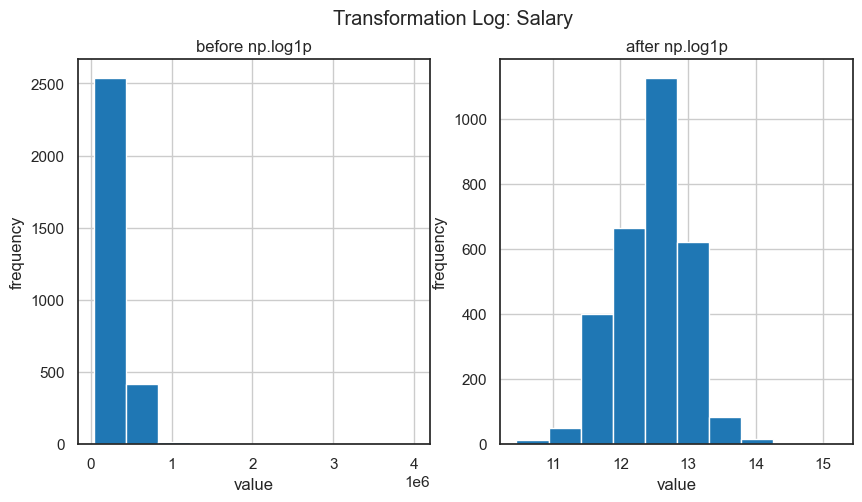

In [104]:
#Let's look at what happens to one of these features, when we apply np.log1p visually

#Choose a field
field = "Salary"

#Create two "subplots" and ad "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10,5))
#plt.subplots is going to allow you to graph 2 axis in 1 figure

#Create a histogram on the "ax_before" subplot
df2[field].hist(ax=ax_before, color='tab:blue', edgecolor='white')
#We have a positive skew (right-skewed), consistent with skew values that we have in the cell above

#Apply a log transformation (numpy syntax) to this column
df2[field].apply(np.log1p).hist(ax=ax_after, color='tab:blue', edgecolor='white')
#We see that we have a much more normally distributed dataset

#Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Transformation Log: Salary'); #suptitle is super title

Skewness: 6.980897


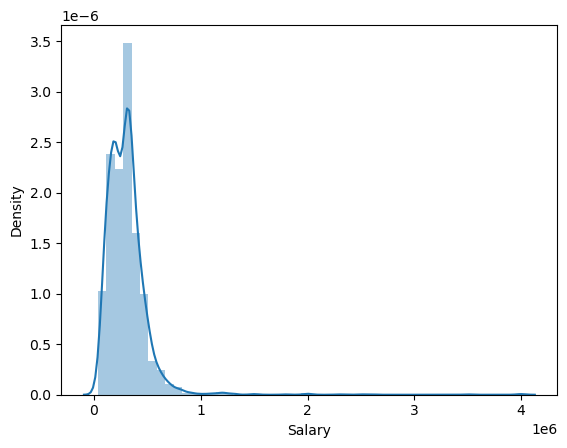

In [37]:
# Enter your code and run the cell
salary_untransformed = sns.distplot(df2['Salary'])
print("Skewness: %f" % df2['Salary'].skew())

Skewness: -0.129898


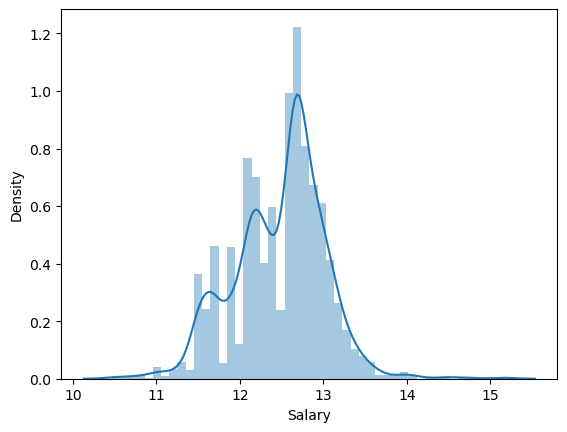

In [38]:
log_transformed1 = np.log(df2['Salary'])
salary_transformed1 = sns.distplot(log_transformed1)
print("Skewness: %f" % (log_transformed1).skew())

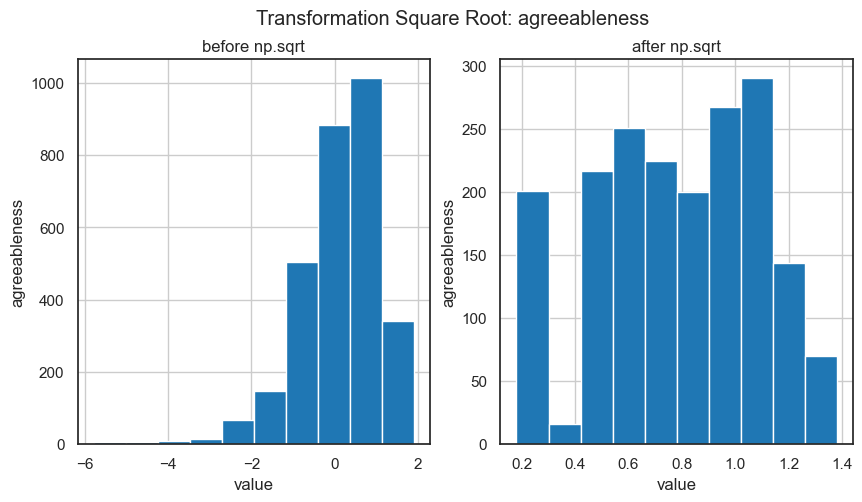

In [103]:
#Choose a field
field1 = "agreeableness"

#Create two "subplots" and ad "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10,5))
#plt.subplots is going to allow you to graph 2 axis in 1 figure

#Create a histogram on the "ax_before" subplot
df2[field1].hist(ax=ax_before, color='tab:blue', edgecolor='white')
#We have a positive skew (right-skewed), consistent with skew values that we have in the cell above

#Apply a log transformation (numpy syntax) to this column
df2[field1].apply(np.sqrt).hist(ax=ax_after, color='tab:blue', edgecolor='white')
#We see that we have a much more normally distributed dataset

#Formatting of titles etc. for each subplot
ax_before.set(title='before np.sqrt', ylabel='agreeableness', xlabel='value')
ax_after.set(title='after np.sqrt', ylabel='agreeableness', xlabel='value')
fig.suptitle('Transformation Square Root: agreeableness'); #suptitle is super title

Skewness: -1.263306


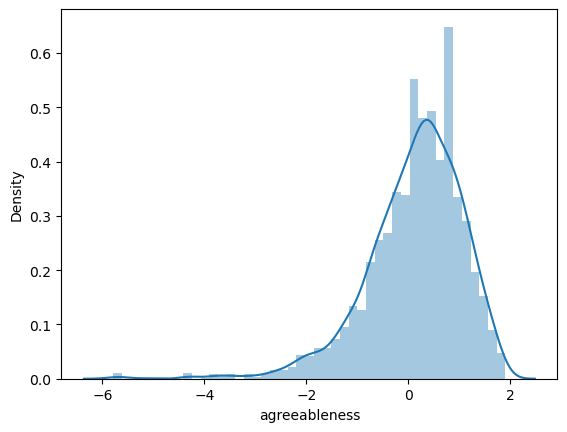

In [40]:
# Enter your code and run the cell
agreeableness_untransformed = sns.distplot(df2['agreeableness'])
print("Skewness: %f" % df2['agreeableness'].skew())

Skewness: -0.266390


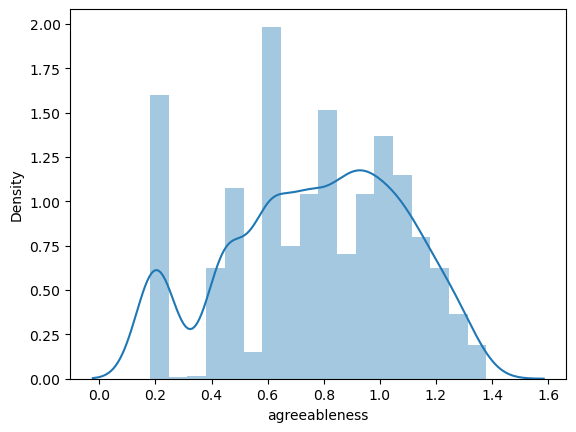

In [41]:
sqrt_transformed1 = np.sqrt(df2['agreeableness'])
agreeableness_transformed1 = sns.distplot(sqrt_transformed1)
print("Skewness: %f" % (sqrt_transformed1).skew())

## Exploratory Data Analysis (more)

In [42]:
df2.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [43]:
dist_Gender = df2['Gender'].value_counts(ascending=False)
dist_Gender

m    2274
f     715
Name: Gender, dtype: int64

In [44]:
palette_Spectral = sns.color_palette('Spectral', 10)
palette_inferno = sns.color_palette('inferno', 10)
palette_icefire = sns.color_palette('icefire', 10)
palette_viridis = sns.color_palette('viridis', 10)
palette_red = sns.color_palette('RdYlGn', 10)
palette_coolwarm = sns.color_palette('coolwarm', 10)

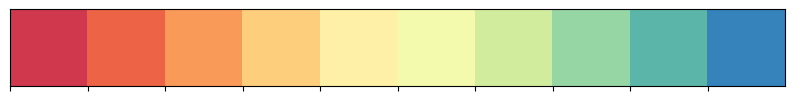

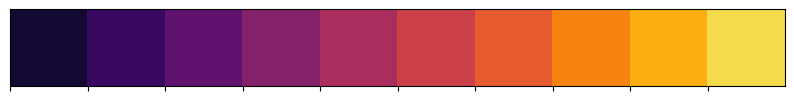

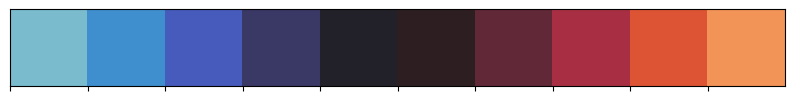

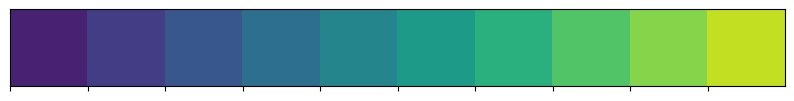

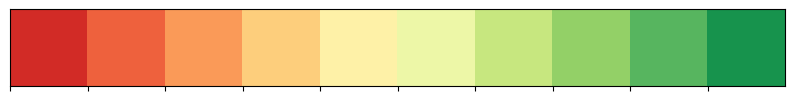

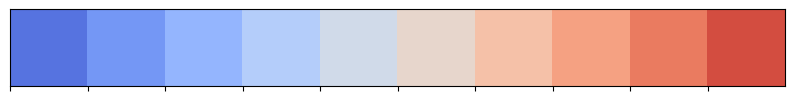

In [45]:
sns.palplot(palette_Spectral)
sns.palplot(palette_inferno)
sns.palplot(palette_icefire)
sns.palplot(palette_viridis)
sns.palplot(palette_red)
sns.palplot(palette_coolwarm)

In [113]:
#palette_Spectral = sns.color_palette("Spectral", 10)
#palette1 = sns.color_palette([palette_Spectral[0], palette_Spectral[1], palette_Spectral[3]])
#sns.palplot(palette_Spectral)

In [112]:
#sns.palplot(palette1)

In [48]:
cmap_Gender = sns.color_palette([palette_inferno[0], palette_inferno[5]], as_cmap=True)

<Axes: title={'center': 'Distribution of Gender'}>

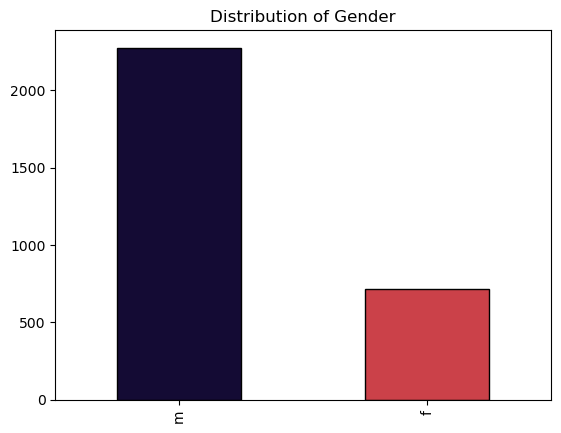

In [49]:
dist_Gender.plot(kind='bar', title='Distribution of Gender', color=cmap_Gender, edgecolor='black')

In [50]:
dist_CollegeTier = df2['CollegeTier'].value_counts(ascending=False)
dist_CollegeTier

2    2765
1     224
Name: CollegeTier, dtype: int64

In [114]:
palette_coolwarm = sns.color_palette("coolwarm", 300)
#palette2 = sns.color_palette([palette_coolwarm[0], palette_coolwarm[1], palette_viridis[3]])
#sns.palplot(palette_coolwarm)

In [115]:
cmap_CG = sns.color_palette([palette_coolwarm[299], palette_coolwarm[0]], as_cmap=True)

<Axes: title={'center': 'Distribution of CollegeTier'}>

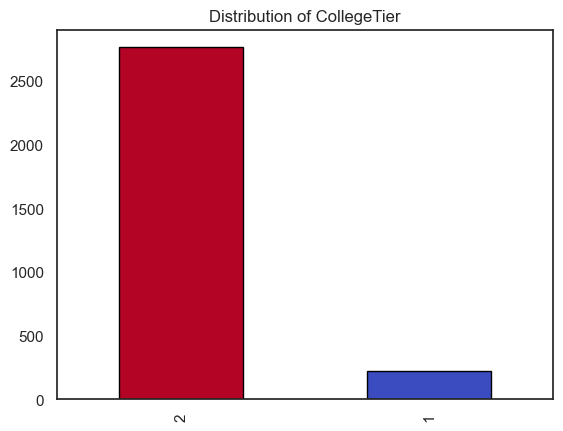

In [116]:
#color_palette_CG = sns.color_palette("coolwarm")
dist_CollegeTier.plot(kind='bar', title='Distribution of CollegeTier', color=cmap_CG , edgecolor='black')

In [54]:
dist_degree = df2['Degree'].value_counts(ascending=False)
dist_degree

B.Tech/B.E.      2750
MCA               200
M.Tech./M.E.       38
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [55]:
cmap_Degree = sns.color_palette([palette_icefire[5], palette_icefire[3], palette_Spectral[9], palette_Spectral[5]], as_cmap=True)

<Axes: title={'center': 'Distribution of Degree'}>

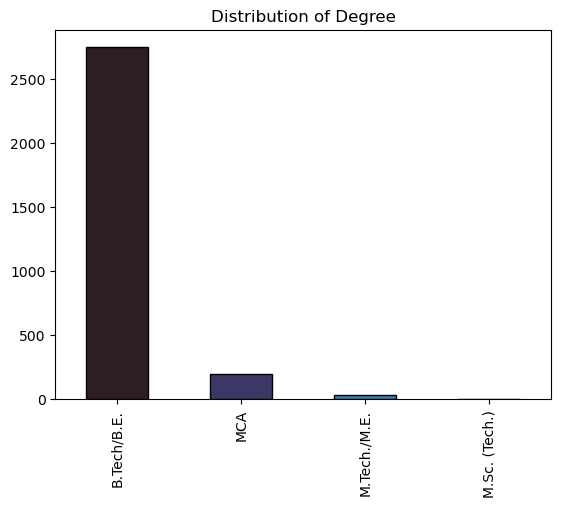

In [59]:
#color_palette_Degree = sns.color_palette('inferno')
dist_degree.plot(kind='bar', title='Distribution of Degree', color=cmap_Degree, edgecolor='black')

In [60]:
dist_spec = df2['Specialization'].value_counts(ascending=False)
dist_spec

electronics and communication engineering      670
computer science & engineering                 556
information technology                         503
computer engineering                           414
computer application                           201
mechanical engineering                         152
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         12
biotechnology                                   12
Name: Specialization, dtype: int64

<Axes: title={'center': 'Distribution of Specialization'}>

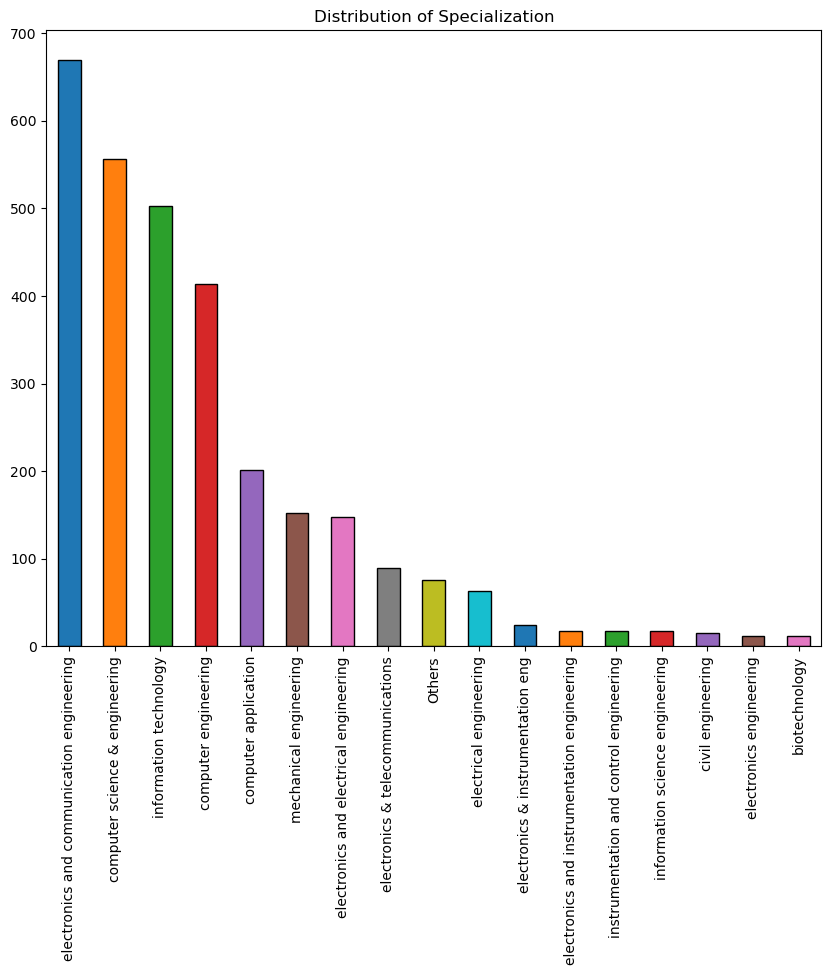

In [61]:
color_palette_Spec = sns.color_palette('tab10')
dist_spec.plot(kind='bar',figsize=(10,8), title='Distribution of Specialization', color=color_palette_Spec, edgecolor='black')

In [62]:
df3 = df2[['Gender', 'Degree', 'collegeGPA', 'Salary', 'Specialization', 'CollegeTier']].copy()
df3.head()

Gender       Degree  collegeGPA  Salary  \
0      f  B.Tech/B.E.       73.82  445000   
1      m  B.Tech/B.E.       65.00  110000   
2      m  B.Tech/B.E.       61.94  255000   
3      m  B.Tech/B.E.       80.40  420000   
4      f  B.Tech/B.E.       64.30  200000   

                            Specialization  CollegeTier  
0  instrumentation and control engineering            1  
1           computer science & engineering            2  
2         electronics & telecommunications            2  
3           computer science & engineering            1  
4                            biotechnology            2

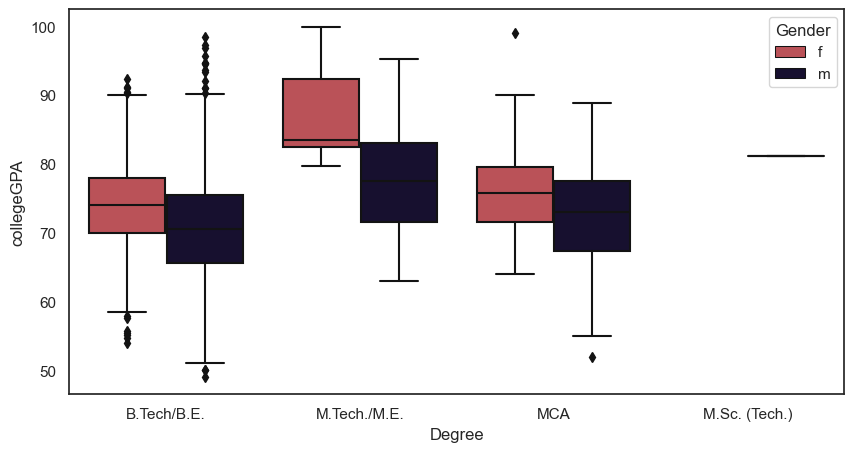

In [63]:
sns.set_style('white')
sns.set_context('notebook')
#sns.set_palette('cmap_Gender')
#cmap_Gender1 = sns.color_palette([palette_tab10[0], palette_tab10[2], palette_tab10[1]], as_cmap=True)
cmap_Gender1 = sns.color_palette([palette_inferno[5], palette_inferno[0]], as_cmap=True)
sns.set_palette(sns.color_palette(cmap_Gender1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='Degree', y='collegeGPA', 
            hue='Gender', data=df2);

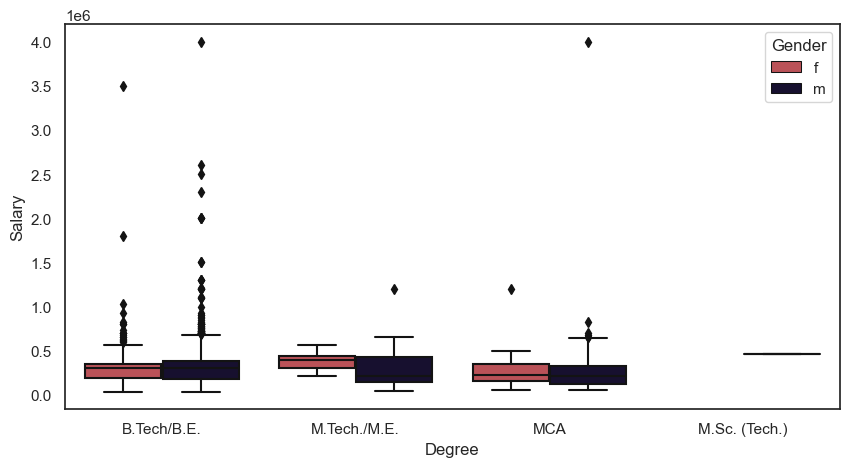

In [64]:
sns.set_style('white')
sns.set_context('notebook')
#sns.set_palette('Spectral')
sns.set_palette(sns.color_palette(cmap_Gender1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='Degree', y='Salary', 
            hue='Gender', data=df2);

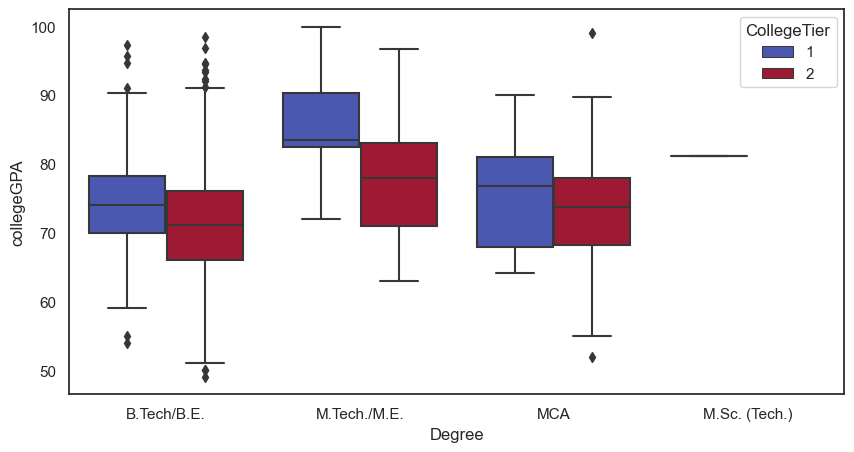

In [65]:
sns.set_style('white')
sns.set_context('notebook')
#sns.set_palette('tab10')
#cmap_CG1 = sns.color_palette([palette_coolwarm[0], palette_coolwarm[9], palette_coolwarm[1]], as_cmap=True)
cmap_CG1 = sns.color_palette([palette_coolwarm[0], palette_coolwarm[299]], as_cmap=True)
sns.set_palette(sns.color_palette(cmap_CG1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='Degree', y='collegeGPA', 
            hue='CollegeTier', data=df2);

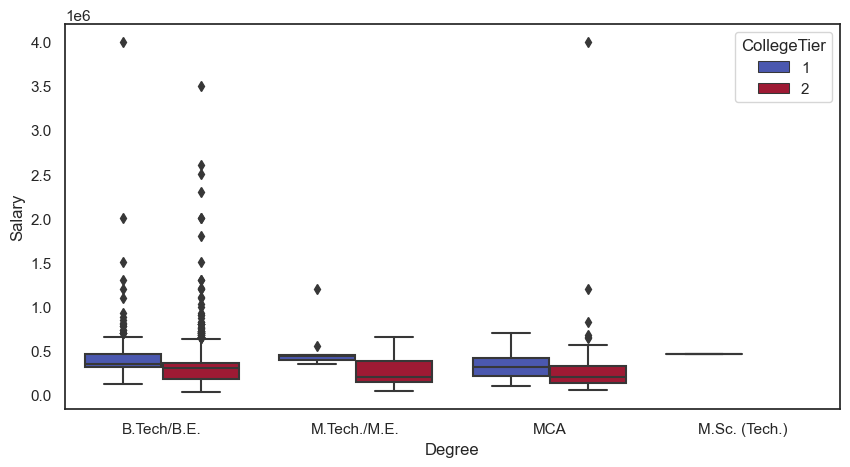

In [66]:
sns.set_style('white')
sns.set_context('notebook')
#sns.set_palette('tab10')
sns.set_palette(sns.color_palette(cmap_CG1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='Degree', y='Salary', 
            hue='CollegeTier', data=df2);

<Axes: xlabel='collegeGPA', ylabel='Salary'>

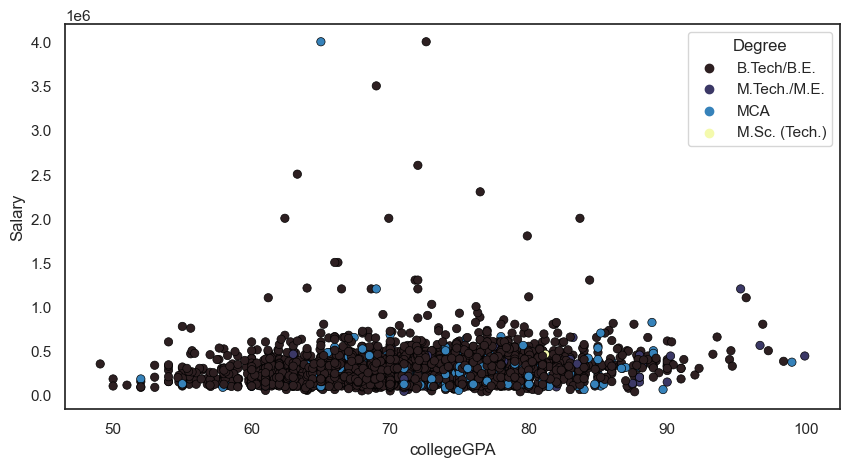

In [67]:
plt.figure(figsize = (10,5))
sns.set_palette(sns.color_palette(cmap_Degree))
sns.scatterplot(data=df3, x=df3.collegeGPA, y=df3.Salary, hue = df3.Degree, edgecolor='black')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

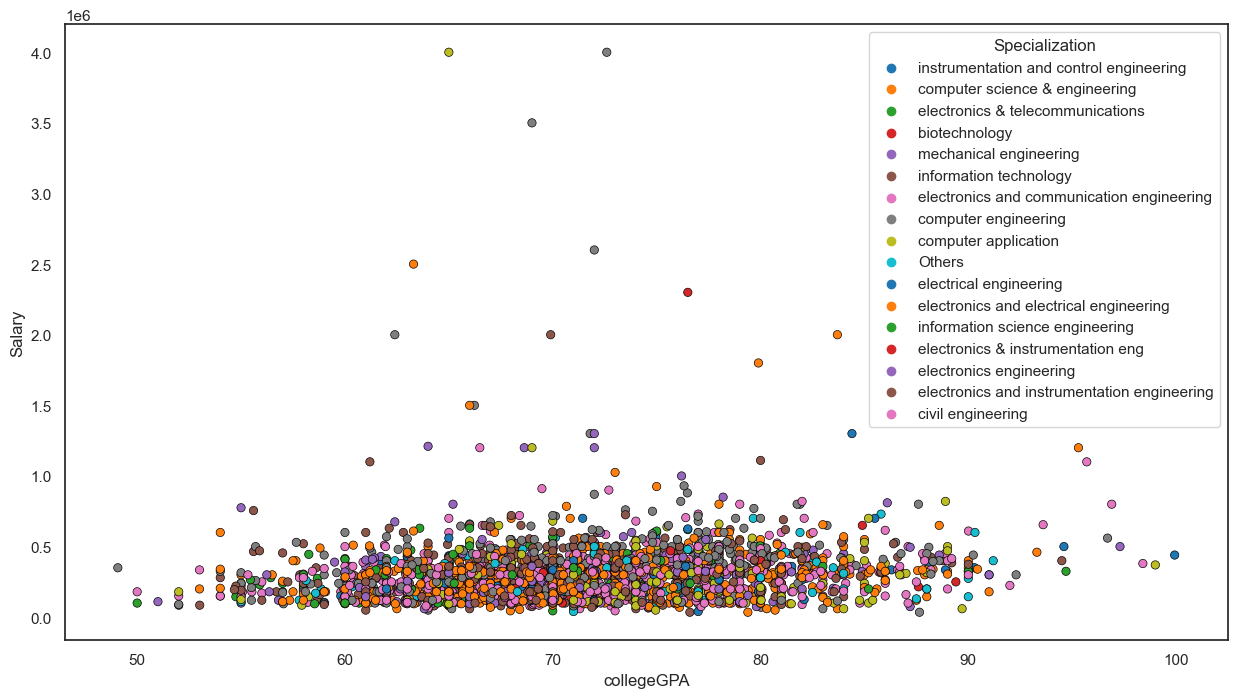

In [68]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df3, x=df3.collegeGPA, y=df3.Salary, hue = df3.Specialization, palette = 'tab10', edgecolor='black')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

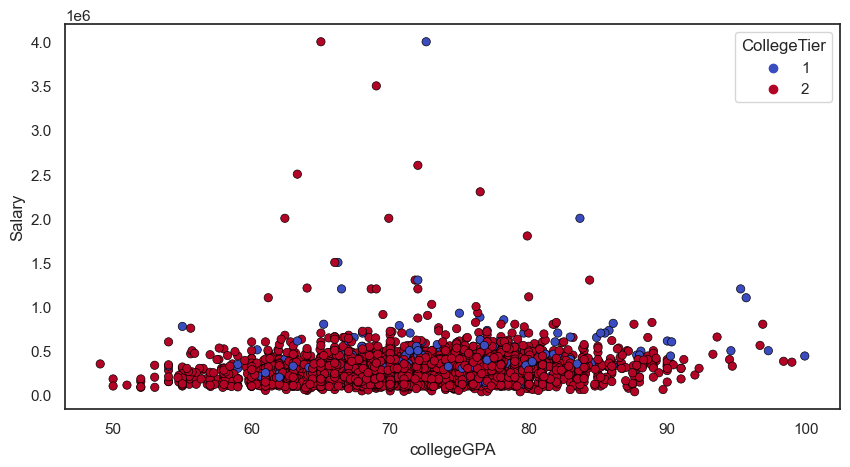

In [69]:
plt.figure(figsize = (10,5))
#sns.set_palette(sns.color_palette(cmap_Degree))
sns.scatterplot(data=df3, x=df3.collegeGPA, y=df3.Salary, hue = df3.CollegeTier, palette='coolwarm', edgecolor='black')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

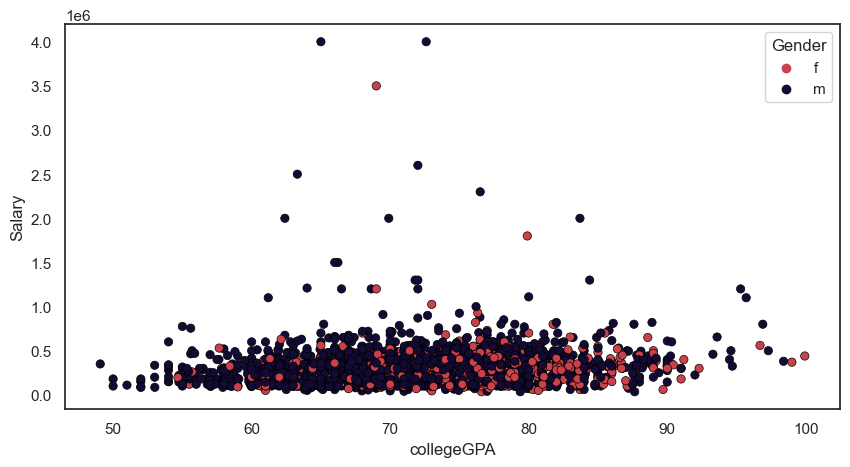

In [70]:
plt.figure(figsize = (10,5))
sns.set_palette(sns.color_palette(cmap_Gender1))
sns.scatterplot(data=df3, x=df3.collegeGPA, y=df3.Salary, hue = df3.Gender, edgecolor='black')

<Axes: xlabel='Salary', ylabel='Specialization'>

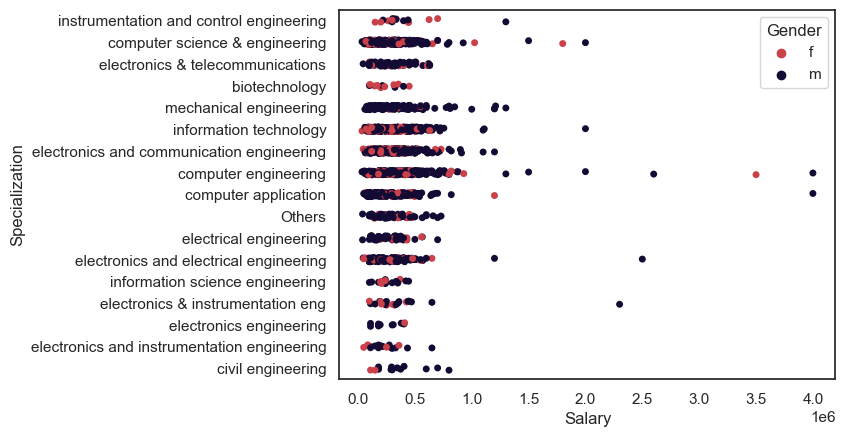

In [71]:
#sns.set_palette('tab10')
sns.set_palette(sns.color_palette(cmap_Gender1))
sns.stripplot(data=df3, x='Salary', y="Specialization", hue="Gender", edgecolor='black')

<Axes: xlabel='Salary', ylabel='Specialization'>

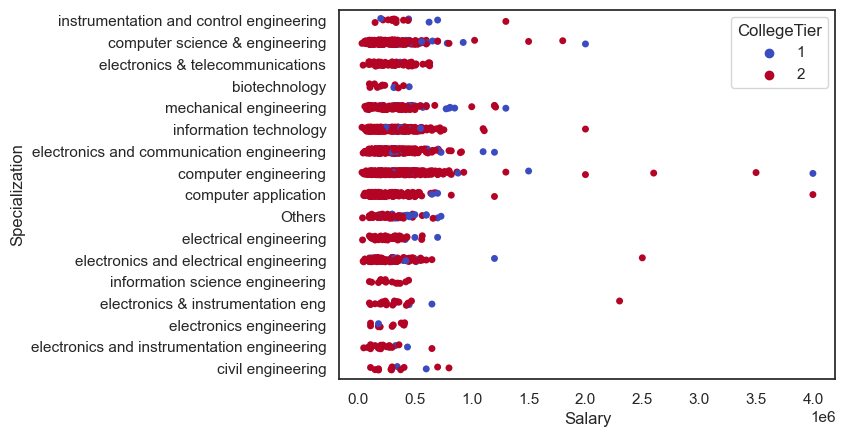

In [72]:
#sns.set_palette('Spectral')
sns.stripplot(data=df3, x='Salary', y="Specialization", hue="CollegeTier", palette='coolwarm', edgecolor='black')

<Axes: xlabel='collegeGPA', ylabel='Specialization'>

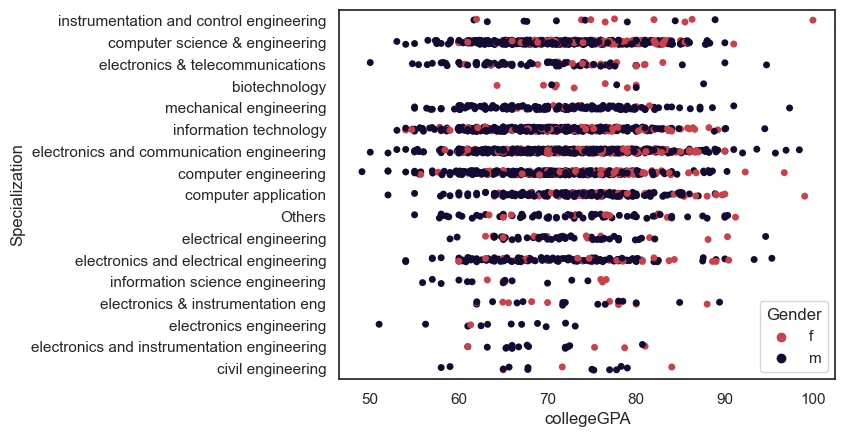

In [73]:
sns.set_palette(sns.color_palette(cmap_Gender1))
sns.stripplot(data=df3, x='collegeGPA', y="Specialization", hue="Gender")

<Axes: xlabel='collegeGPA', ylabel='Specialization'>

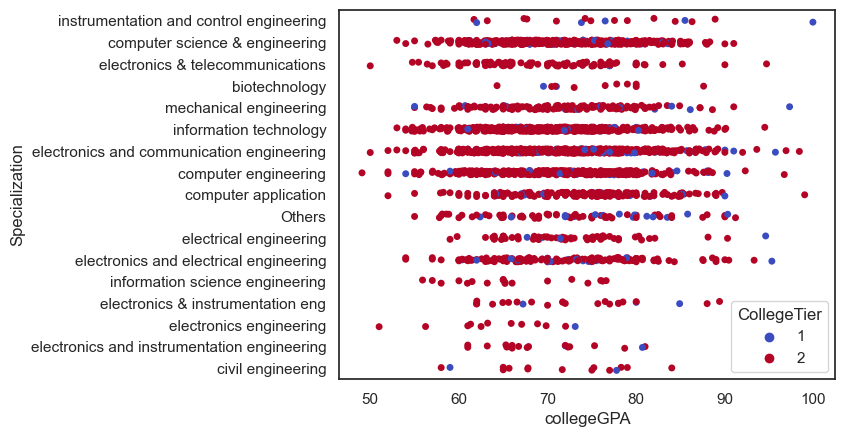

In [74]:
sns.stripplot(data=df3, x='collegeGPA', y="Specialization", hue="CollegeTier", palette='coolwarm')

# [3] Feature Engineering

## Data Preprocessing 

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   10percentage           2989 non-null   float64
 2   12percentage           2989 non-null   float64
 3   CollegeTier            2989 non-null   int64  
 4   Degree                 2989 non-null   object 
 5   Specialization         2989 non-null   object 
 6   collegeGPA             2989 non-null   float64
 7   English                2989 non-null   int64  
 8   Logical                2989 non-null   int64  
 9   Quant                  2989 non-null   int64  
 10  Domain                 2989 non-null   float64
 11  ComputerProgramming    2989 non-null   float64
 12  ElectronicsAndSemicon  2989 non-null   float64
 13  ComputerScience        2989 non-null   float64
 14  MechanicalEngg         2989 non-null   float64
 15  Elec

In [76]:
#We can see that Gender, Degree, and Specialization are 'object' variables, which aren't suitable for ML input.
#Hence, we need to process those variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4 = df2.copy()
df4.Gender = le.fit_transform(df4.Gender)
df4.Degree = le.fit_transform(df4.Degree)
df4.Specialization = le.fit_transform(df4.Specialization)

In [77]:
df4.head()

Gender  10percentage  12percentage  CollegeTier  Degree  Specialization  \
0       0         87.80         84.00            1       0              15   
1       1         57.00         64.50            2       0               5   
2       1         77.33         85.17            2       0               8   
3       1         84.30         86.00            1       0               5   
4       0         82.00         75.00            2       0               1   

   collegeGPA  English  Logical  Quant  ...  MechanicalEngg  ElectricalEngg  \
0       73.82      650      665    810  ...      401.174863      423.336066   
1       65.00      440      435    210  ...      401.174863      423.336066   
2       61.94      485      475    505  ...      401.174863      423.336066   
3       80.40      675      620    635  ...      401.174863      423.336066   
4       64.30      575      495    365  ...      401.174863      423.336066   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0   349.879562     341.96            -0.1590         0.3789        1.2396   
1   349.879562     341.96             1.1336         0.0459        1.2396   
2   260.000000     341.96             0.5100        -0.1232        1.5428   
3   349.879562     341.96            -0.4463         0.2124        0.3174   
4   349.879562     341.96            -1.4992        -0.7473       -1.0697   

   nueroticism  openess_to_experience  Salary  
0      0.14590                 0.2889  445000  
1      0.52620                -0.2859  110000  
2     -0.29020                -0.2875  255000  
3      0.27270                 0.4805  420000  
4      0.06223                 0.1864  200000  

[5 rows x 24 columns]

## Feature Scaling 

In [78]:
#normalize our data
norm_data = MinMaxScaler().fit_transform(df2_num)
norm_data

array([[0.81811541, 0.74957411, 0.        , ..., 0.46516554, 0.8510643 ,
        0.10340479],
       [0.25566107, 0.41737649, 1.        , ..., 0.52859645, 0.78723948,
        0.01891551],
       [0.62691746, 0.76950596, 1.        , ..., 0.39242765, 0.78706182,
        0.0554855 ],
       ...,
       [0.88385683, 0.43543441, 1.        , ..., 0.45122175, 0.89230393,
        0.08827238],
       [0.83345508, 0.4286201 , 1.        , ..., 0.19641898, 0.879157  ,
        0.12484237],
       [0.62089116, 0.60477002, 1.        , ..., 0.63432574, 0.55319291,
        0.04161412]])

In [79]:
#standardize our data
scaled_data = StandardScaler().fit_transform(df2_num)
scaled_data

array([[ 1.01404346,  0.86990384, -3.51336733, ...,  0.28809347,
         0.42693845,  0.65899772],
       [-2.06798607, -0.88360688,  0.28462723, ...,  0.6636889 ,
        -0.1436    , -0.91886628],
       [-0.03364645,  0.97511448,  0.28462723, ..., -0.14261169,
        -0.14518814, -0.23591022],
       ...,
       [ 1.37428068, -0.78828784,  0.28462723, ...,  0.20552765,
         0.79558491,  0.37639521],
       [ 1.09809881, -0.82425729,  0.28462723, ..., -1.30324405,
         0.67806272,  1.05935127],
       [-0.06666819,  0.10555301,  0.28462723, ...,  1.28974713,
        -2.23577286, -0.49496252]])

We already made distribution plot of our Target (Salary), and the plot's specifying a right skewed / positive skewed distribution. We also can see evidence in correlation plots that there are upward-curved relationships rather than simple linear correspondence in the relationship between 'Salary' to 'agreeableness' and 'openess_to_experience'. So perhaps we want to take a polynomial function there. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

## Polynomial Features 

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   10percentage           2989 non-null   float64
 2   12percentage           2989 non-null   float64
 3   CollegeTier            2989 non-null   int64  
 4   Degree                 2989 non-null   object 
 5   Specialization         2989 non-null   object 
 6   collegeGPA             2989 non-null   float64
 7   English                2989 non-null   int64  
 8   Logical                2989 non-null   int64  
 9   Quant                  2989 non-null   int64  
 10  Domain                 2989 non-null   float64
 11  ComputerProgramming    2989 non-null   float64
 12  ElectronicsAndSemicon  2989 non-null   float64
 13  ComputerScience        2989 non-null   float64
 14  MechanicalEngg         2989 non-null   float64
 15  Elec

In [81]:
#Separate our features from our target
X = df2.loc[:,['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'Specialization',
                'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
                'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]

Y = df2['Salary']

In [82]:
X2 = X.copy()

X2['agree2'] = X2['agreeableness'] ** 2
X2['opennes2'] = X2['openess_to_experience'] ** 2

## Categories and Features derived from Category Aggregates

we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called dummy variables or one-hot encoding.

In [83]:
df2['Degree'].value_counts()

B.Tech/B.E.      2750
MCA               200
M.Tech./M.E.       38
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [106]:
df2.head()

Gender  10percentage  12percentage  CollegeTier       Degree  \
0      f         87.80         84.00            1  B.Tech/B.E.   
1      m         57.00         64.50            2  B.Tech/B.E.   
2      m         77.33         85.17            2  B.Tech/B.E.   
3      m         84.30         86.00            1  B.Tech/B.E.   
4      f         82.00         75.00            2  B.Tech/B.E.   

                            Specialization  collegeGPA  English  Logical  \
0  instrumentation and control engineering       73.82      650      665   
1           computer science & engineering       65.00      440      435   
2         electronics & telecommunications       61.94      485      475   
3           computer science & engineering       80.40      675      620   
4                            biotechnology       64.30      575      495   

   Quant  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0    810  ...      401.174863      423.336066   349.879562     341.96   
1    210  ...      401.174863      423.336066   349.879562     341.96   
2    505  ...      401.174863      423.336066   260.000000     341.96   
3    635  ...      401.174863      423.336066   349.879562     341.96   
4    365  ...      401.174863      423.336066   349.879562     341.96   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0            -0.1590         0.3789        1.2396      0.14590   
1             1.1336         0.0459        1.2396      0.52620   
2             0.5100        -0.1232        1.5428     -0.29020   
3            -0.4463         0.2124        0.3174      0.27270   
4            -1.4992        -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  

[5 rows x 24 columns]

In [84]:
#We can call pd.get_dummies() on our entire dataset to quickly get data with all the original features and dummy variable
#representation of any categorical features. Let's look at some variable values

pd.get_dummies(df2)

#Before we only had 24 columns, but now we have 44 columns

10percentage  12percentage  CollegeTier  collegeGPA  English  Logical  \
0            87.80         84.00            1       73.82      650      665   
1            57.00         64.50            2       65.00      440      435   
2            77.33         85.17            2       61.94      485      475   
3            84.30         86.00            1       80.40      675      620   
4            82.00         75.00            2       64.30      575      495   
...            ...           ...          ...         ...      ...      ...   
2993         75.00         73.00            2       70.00      505      485   
2994         84.00         77.00            2       75.20      345      585   
2995         91.40         65.56            2       73.19      385      425   
2996         88.64         65.16            2       74.81      465      645   
2997         77.00         75.50            2       69.30      370      390   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ...  \
0       810  0.694479           485.000000             366.000000  ...   
1       210  0.342315           365.000000             335.947917  ...   
2       505  0.824666           449.620837             400.000000  ...   
3       635  0.990009           655.000000             335.947917  ...   
4       365  0.278457           315.000000             335.947917  ...   
...     ...       ...                  ...                    ...  ...   
2993    445  0.538387           245.000000             333.000000  ...   
2994    395  0.190153           315.000000             335.947917  ...   
2995    485  0.600057           435.000000             335.947917  ...   
2996    505  0.901490           545.000000             335.947917  ...   
2997    285  0.486747           315.000000             335.947917  ...   

      Specialization_electronics & instrumentation eng  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
2993                                                 0   
2994                                                 0   
2995                                                 0   
2996                                                 0   
2997                                                 0   

      Specialization_electronics & telecommunications  \
0                                                   0   
1                                                   0   
2                                                   1   
3                                                   0   
4                                                   0   
...                                               ...   
2993                                                0   
2994                                                0   
2995                                                0   
2996                                                0   
2997                                                0   

      Specialization_electronics and communication engineering  \
0                                                     0          
1                                                     0          
2                                                     0          
3                                                     0          
4                                                     0          
...                                                 ...          
2993                                                  1          
2994                                                  0          
2995                                                  0          
2996                                                  0          
2997                                                  0     

In [111]:
b = df2.loc[:,['Degree']]
b.head()

Degree
0  B.Tech/B.E.
1  B.Tech/B.E.
2  B.Tech/B.E.
3  B.Tech/B.E.
4  B.Tech/B.E.

In [107]:
pd.get_dummies(df2['Degree'], drop_first=False).head()

B.Tech/B.E.  M.Sc. (Tech.)  M.Tech./M.E.  MCA
0            1              0             0    0
1            1              0             0    0
2            1              0             0    0
3            1              0             0    0
4            1              0             0    0

## Polynomial Features in Scikit-Learn 

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
#Instantiate and provide desired degree;
#Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [88]:
features = ['agreeableness', 'openess_to_experience']
pf.fit(df2[features])

PolynomialFeatures()

In [89]:
pf.get_feature_names_out() #Must add input_features = features for appropriate name

array(['1', 'agreeableness', 'openess_to_experience', 'agreeableness^2',
       'agreeableness openess_to_experience', 'openess_to_experience^2'],
      dtype=object)

In [90]:
feat_array = pf.transform(df2[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

1  agreeableness  openess_to_experience  agreeableness^2  \
0     1.0         0.3789                 0.2889         0.143565   
1     1.0         0.0459                -0.2859         0.002107   
2     1.0        -0.1232                -0.2875         0.015178   
3     1.0         0.2124                 0.4805         0.045114   
4     1.0        -0.7473                 0.1864         0.558457   
...   ...            ...                    ...              ...   
2984  1.0         0.9688                 0.0284         0.938573   
2985  1.0         0.0328                 0.5024         0.001076   
2986  1.0         0.1888                 0.6603         0.035645   
2987  1.0         1.2808                 0.5419         1.640449   
2988  1.0        -1.9521                -2.3937         3.810694   

      agreeableness openess_to_experience  openess_to_experience^2  
0                                0.109464                 0.083463  
1                               -0.013123                 0.081739  
2                                0.035420                 0.082656  
3                                0.102058                 0.230880  
4                               -0.139297                 0.034745  
...                                   ...                      ...  
2984                             0.027514                 0.000807  
2985                             0.016479                 0.252406  
2986                             0.124665                 0.435996  
2987                             0.694066                 0.293656  
2988                             4.672742                 5.729800  

[2989 rows x 6 columns]

## Getting to Fancier Features 

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, 

e.g. how hard a specialization based on collegeGPA from one specialization relative to other specializations & how a degree might influence someone's openess to experience

In [91]:
#We're going to group by Specialization, which is our categorical variable
X3 = X.copy()
X3.groupby('Specialization')['collegeGPA'].transform(lambda x: x.mean())

#What the . transform does is it's going to allow us to come up with a value for every single row. So it's going to be similar
#to the groupby or it's going to come up with the same value as long as you're within the same category, but you're not going
#to be limited down to a smaller DataFrame. The DataFrame is going to stay the same size.

#We do this to get mean value from Specialization

0       76.440556
1       71.779460
2       69.423596
3       71.779460
4       75.005000
          ...    
2993    72.079463
2994    70.715149
2995    70.715149
2996    71.566667
2997    70.715149
Name: collegeGPA, Length: 2989, dtype: float64

In [92]:
def add_deviation_feature(X, feature, category):
    
    #temp groupby object
    category_gb = X.groupby(category)[feature]
    
    #create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    #compute stds from category mean for each feature value,
    #add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std
    X[feature + '_Dev_' + category] = deviation_feature 

In [93]:
X4 = X3.copy()
X4['Degree'] = df2['Degree']
add_deviation_feature(X4, 'openess_to_experience', 'Degree')
add_deviation_feature(X4, 'collegeGPA', 'Specialization')

In [94]:
a = X4.loc[:,['Degree', 'openess_to_experience', 'openess_to_experience_Dev_Degree', 'collegeGPA', 'Specialization',
             'collegeGPA_Dev_Specialization']]
a

#openess_to_experience_Dev_Degree 0.426733 (1st row) means that for this Degree, this was higher than the average 
#openess_to_experience for this Degree

#We can see in 2nd and 3rd rows (negatives), mean that they are below the average for that specific Degree

#That's going to tell us if you're looking by Degree whether someone's openess to experience value is higher or lower,
#compared to the average within that certain Degree

#collegeGPA_Dev_Specialization 2nd row is lower than 4th row within its Specialization

Degree  openess_to_experience  openess_to_experience_Dev_Degree  \
0     B.Tech/B.E.                 0.2889                          0.426733   
1     B.Tech/B.E.                -0.2859                         -0.143249   
2     B.Tech/B.E.                -0.2875                         -0.144835   
3     B.Tech/B.E.                 0.4805                          0.616726   
4     B.Tech/B.E.                 0.1864                          0.325092   
...           ...                    ...                               ...   
2993  B.Tech/B.E.                 0.0284                          0.168417   
2994  B.Tech/B.E.                 0.5024                          0.638443   
2995  B.Tech/B.E.                 0.6603                          0.795019   
2996  B.Tech/B.E.                 0.5419                          0.677612   
2997  B.Tech/B.E.                -2.3937                         -2.233378   

      collegeGPA                             Specialization  \
0          73.82    instrumentation and control engineering   
1          65.00             computer science & engineering   
2          61.94           electronics & telecommunications   
3          80.40             computer science & engineering   
4          64.30                              biotechnology   
...          ...                                        ...   
2993       70.00  electronics and communication engineering   
2994       75.20                     information technology   
2995       73.19                     information technology   
2996       74.81                       computer engineering   
2997       69.30                     information technology   

      collegeGPA_Dev_Specialization  
0                         -0.255174  
1                         -1.014374  
2                         -0.918264  
3                          1.289844  
4                         -1.698599  
...                             ...  
2993                      -0.279766  
2994                       0.660795  
2995                       0.364643  
2996                       0.449907  
2997                      -0.208507  

[2989 rows x 6 columns]

# [4] Hypothesis Testing

## Hypothesis Testing 1 

$ 𝐻_{0}:\mu_{1}<=\mu_{2} $ The average salary of females are less than or equal to graduates from males. \
$ 𝐻_{A}:\mu_{1}>\mu_{2} $ The average salary of females are greater than or equal to males.

In [95]:
male = df2.loc[df2.Gender == 'm']
male_salary = male.Salary
malesalary_mean = male_salary.mean()
malesalary_mean

309786.2796833773

In [96]:
female = df2.loc[df2.Gender == 'f']
female_salary = female.Salary
femalesalary_mean = female_salary.mean()
femalesalary_mean

290139.86013986013

[Text(0.5, 1.0, 'Male vs Female')]

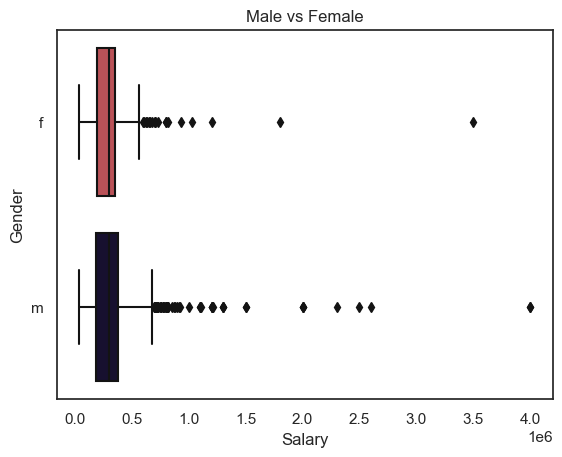

In [97]:
sns.set_palette(sns.color_palette(cmap_Gender1))
sns.boxplot(x=df2.Salary, y=df2.Gender, data=df2).set(title="Male vs Female")

In [98]:
alpha=0.05
t_val, p_value = stats.ttest_ind(male_salary, female_salary)
p_value_onetail = p_value/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val, p_value, p_value_onetail))

t_value = 2.1591696882415574 , p_value =0.03091638149374018 , p_value_onetail = 0.01545819074687009


In [99]:
# Enter your code and run the cell
if p_value <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value_onetail,alpha))
    print("Reject the null hypothesis that the average salary of females are less than or equal to males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Fail to reject the null hypothesis that the average salary of females are less than males.")

Conclusion: since p_value 0.01545819074687009 is less than alpha 0.05 
Reject the null hypothesis that the average salary of females are less than or equal to males.


## Hypothesis Testing 2 

$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the collegeGPA of graduates from CollegeTier 1 and CollegeTier 2. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} != 0 $ There is difference between the collegeGPA of graduates from CollegeTier 1 and CollegeTier 2.

## Hypothesis Testing 3 

$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3} $ The mean Salary of graduates from every Degree are the same. \
$ 𝐻_{A}: $ At least one of the Degrees's salary is not the same.
